In [1]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), "..\\Udacity\\Data Analyst\\Project 3"))
    print(os.getcwd())
except:
	pass

 # 项目3：探索数据集：对巴西病人失约率的研究

 by 小光头 & 大卤蛋

 PS：这份报告是优达学城数据分析入门课程的一项作业；初稿定稿于18年11月，2019年3月再次修订并尝试用机器学习优化。

 ## 综述
 ---

 在巴西Espirito Santo州首府Vitória市，20%的病人预约医生后没能就诊。病人们的失约每年为该市的公共卫生系统造成2000万美元的亏损。这份报告将探索一份由该市的数据分析志愿者提供的10万+行数据集，尝试总结规律，以找到背后的原因。

 在对数据集有了初步的认识之后，我们将通过3个方向上8个具体问题的问题进行研究，分别涵盖病人，预约后等待日期和街区。随后，在这些问题的引导之下，我们根据需求进行了数据的整理和清洗，并进行了探索性的数据分析。最后，我们构筑了逻辑回归，决策树，但我们的模型准确率尚低，不足以运用。我们同时使用了并利用autosklearn构建复合模型，但疑似因为样本分布不均衡的问题，导致这一模型的F1分数很低。

 我们发现了如下规律，以供后续研究进一步探索：1）病人们的等待时间越长，失约率越高；2）收到短信的用户失约率较高，但短信与病患等待时间有线性关系，这也意味着短信作为预防失约机制理论上还有提升的空间。总的来说，我们在探索中的提取变量不能很好的解答病人失约的问题，利用这些变量构建的机器学习存在高偏差的现象。对这一现象进一步的探索还需要对变量之间的关系进行进一步的挖掘和研究。

 <h1>目录<span class="tocSkip"></span></h1>
 <div class="toc"><ul class="toc-item"><li><span><a href="#综述" data-toc-modified-id="综述-0">综述</a></span></li><li><span><a href="#1.-简介" data-toc-modified-id="1.-简介-1">1. 简介</a></span><ul class="toc-item"><li><span><a href="#1.1-导入相关依赖包，项目设定初始化" data-toc-modified-id="1.1-导入相关依赖包，项目设定初始化-1.1">1.1 导入相关依赖包，项目设定初始化</a></span></li><li><span><a href="#1.2-数据集初探" data-toc-modified-id="1.2-数据集初探-1.2">1.2 数据集初探</a></span></li><li><span><a href="#1.3-需要研究的问题" data-toc-modified-id="1.3-需要研究的问题-1.3">1.3 需要研究的问题</a></span></li></ul></li><li><span><a href="#2.-数据集探索和整理" data-toc-modified-id="2.-数据集探索和整理-2">2. 数据集探索和整理</a></span><ul class="toc-item"><li><span><a href="#2.1-常规属性" data-toc-modified-id="2.1-常规属性-2.1">2.1 常规属性</a></span><ul class="toc-item"><li><span><a href="#2.1.1-对数据集索引的调整：列名称中的拼写错误" data-toc-modified-id="2.1.1-对数据集索引的调整：列名称中的拼写错误-2.1.1">2.1.1 对数据集索引的调整：列名称中的拼写错误</a></span></li><li><span><a href="#2.1.2-数据集数据类型" data-toc-modified-id="2.1.2-数据集数据类型-2.1.2">2.1.2 数据集数据类型</a></span></li><li><span><a href="#2.1.3-数据集条目的空值分布" data-toc-modified-id="2.1.3-数据集条目的空值分布-2.1.3">2.1.3 数据集条目的空值分布</a></span></li><li><span><a href="#2.1.4-数据集各条目的唯一值分布" data-toc-modified-id="2.1.4-数据集各条目的唯一值分布-2.1.4">2.1.4 数据集各条目的唯一值分布</a></span></li><li><span><a href="#2.1.5-数据集各列的数值的统计性描述" data-toc-modified-id="2.1.5-数据集各列的数值的统计性描述-2.1.5">2.1.5 数据集各列的数值的统计性描述</a></span></li><li><span><a href="#2.1.6-查看“年龄”列的异常值" data-toc-modified-id="2.1.6-查看“年龄”列的异常值-2.1.6">2.1.6 查看“年龄”列的异常值</a></span></li><li><span><a href="#2.1.7-重复数据的发现，及对其影响的讨论" data-toc-modified-id="2.1.7-重复数据的发现，及对其影响的讨论-2.1.7">2.1.7 重复数据的发现，及对其影响的讨论</a></span></li><li><span><a href="#2.1.8-对数据集常规属性观察的小结" data-toc-modified-id="2.1.8-对数据集常规属性观察的小结-2.1.8">2.1.8 对数据集常规属性观察的小结</a></span></li></ul></li><li><span><a href="#2.2-清理隐蔽的重复数据" data-toc-modified-id="2.2-清理隐蔽的重复数据-2.2">2.2 清理隐蔽的重复数据</a></span><ul class="toc-item"><li><span><a href="#2.2.1-检查重复数据" data-toc-modified-id="2.2.1-检查重复数据-2.2.1">2.2.1 检查重复数据</a></span></li><li><span><a href="#2.2.2-抛弃重复数据" data-toc-modified-id="2.2.2-抛弃重复数据-2.2.2">2.2.2 抛弃重复数据</a></span></li><li><span><a href="#2.2.3-小结" data-toc-modified-id="2.2.3-小结-2.2.3">2.2.3 小结</a></span></li></ul></li><li><span><a href="#2.3-对数据集各列的初步探索" data-toc-modified-id="2.3-对数据集各列的初步探索-2.3">2.3 对数据集各列的初步探索</a></span><ul class="toc-item"><li><span><a href="#2.3.1-对数值型数据列的探索和处理" data-toc-modified-id="2.3.1-对数值型数据列的探索和处理-2.3.1">2.3.1 对数值型数据列的探索和处理</a></span><ul class="toc-item"><li><span><a href="#病人ID" data-toc-modified-id="病人ID-2.3.1.1">病人ID</a></span></li><li><span><a href="#预约ID" data-toc-modified-id="预约ID-2.3.1.2">预约ID</a></span></li></ul></li><li><span><a href="#2.3.2-对分类型数据的探索" data-toc-modified-id="2.3.2-对分类型数据的探索-2.3.2">2.3.2 对分类型数据的探索</a></span><ul class="toc-item"><li><span><a href="#性别" data-toc-modified-id="性别-2.3.2.1">性别</a></span></li><li><span><a href="#国家补助" data-toc-modified-id="国家补助-2.3.2.2">国家补助</a></span></li><li><span><a href="#高血压" data-toc-modified-id="高血压-2.3.2.3">高血压</a></span></li><li><span><a href="#糖尿病" data-toc-modified-id="糖尿病-2.3.2.4">糖尿病</a></span></li><li><span><a href="#酗酒" data-toc-modified-id="酗酒-2.3.2.5">酗酒</a></span></li><li><span><a href="#伤残" data-toc-modified-id="伤残-2.3.2.6">伤残</a></span></li><li><span><a href="#短信提醒" data-toc-modified-id="短信提醒-2.3.2.7">短信提醒</a></span></li></ul></li><li><span><a href="#2.3.3--探索进一步处理后作为分组依据的数据" data-toc-modified-id="2.3.3--探索进一步处理后作为分组依据的数据-2.3.3">2.3.3  探索进一步处理后作为分组依据的数据</a></span><ul class="toc-item"><li><span><a href="#年龄" data-toc-modified-id="年龄-2.3.3.1">年龄</a></span></li><li><span><a href="#日期：预约日-&amp;-就诊日" data-toc-modified-id="日期：预约日-&amp;-就诊日-2.3.3.2">日期：预约日 &amp; 就诊日</a></span></li><li><span><a href="#街区" data-toc-modified-id="街区-2.3.3.3">街区</a></span></li></ul></li></ul></li><li><span><a href="#2.4-小结：数据集探索和整理的阶段性成果" data-toc-modified-id="2.4-小结：数据集探索和整理的阶段性成果-2.4">2.4 小结：数据集探索和整理的阶段性成果</a></span></li></ul></li><li><span><a href="#3.-探索性数据分析" data-toc-modified-id="3.-探索性数据分析-3">3. 探索性数据分析</a></span><ul class="toc-item"><li><span><a href="#3.1-预约数量与失约率" data-toc-modified-id="3.1-预约数量与失约率-3.1">3.1 预约数量与失约率</a></span></li><li><span><a href="#3.2-预约后的等待时间与病人失约率之间的关系" data-toc-modified-id="3.2-预约后的等待时间与病人失约率之间的关系-3.2">3.2 预约后的等待时间与病人失约率之间的关系</a></span></li><li><span><a href="#3.3-探索病人档案与病人失约率之间的关系" data-toc-modified-id="3.3-探索病人档案与病人失约率之间的关系-3.3">3.3 探索病人档案与病人失约率之间的关系</a></span><ul class="toc-item"><li><span><a href="#3.3.1-对单个分类变量的失约率观察" data-toc-modified-id="3.3.1-对单个分类变量的失约率观察-3.3.1">3.3.1 对单个分类变量的失约率观察</a></span><ul class="toc-item"><li><span><a href="#性别（失约率差距不大）" data-toc-modified-id="性别（失约率差距不大）-3.3.1.1">性别（失约率差距不大）</a></span></li><li><span><a href="#国家补助（判断为真时，失约率提高）" data-toc-modified-id="国家补助（判断为真时，失约率提高）-3.3.1.2">国家补助（判断为真时，失约率提高）</a></span></li><li><span><a href="#高血压（判断为真时，失约率降低）" data-toc-modified-id="高血压（判断为真时，失约率降低）-3.3.1.3">高血压（判断为真时，失约率降低）</a></span></li><li><span><a href="#糖尿病（判断为真时，失约率降低）" data-toc-modified-id="糖尿病（判断为真时，失约率降低）-3.3.1.4">糖尿病（判断为真时，失约率降低）</a></span></li><li><span><a href="#酗酒（失约率差距不大）" data-toc-modified-id="酗酒（失约率差距不大）-3.3.1.5">酗酒（失约率差距不大）</a></span></li><li><span><a href="#短信提醒（判断为真时，失约率提高）" data-toc-modified-id="短信提醒（判断为真时，失约率提高）-3.3.1.6">短信提醒（判断为真时，失约率提高）</a></span></li><li><span><a href="#伤残（判断为真时，失约率降低）" data-toc-modified-id="伤残（判断为真时，失约率降低）-3.3.1.7">伤残（判断为真时，失约率降低）</a></span></li><li><span><a href="#小结" data-toc-modified-id="小结-3.3.1.8">小结</a></span></li></ul></li><li><span><a href="#3.3.2-用户细分，与每个细分群体的失约率" data-toc-modified-id="3.3.2-用户细分，与每个细分群体的失约率-3.3.2">3.3.2 用户细分，与每个细分群体的失约率</a></span></li></ul></li><li><span><a href="#3.4-所在街区与失约率之间的关系" data-toc-modified-id="3.4-所在街区与失约率之间的关系-3.4">3.4 所在街区与失约率之间的关系</a></span></li><li><span><a href="#3.5-上述变量之间的相互关系" data-toc-modified-id="3.5-上述变量之间的相互关系-3.5">3.5 上述变量之间的相互关系</a></span><ul class="toc-item"><li><span><a href="#3.5.1-病人居住地-vs.-等待时长" data-toc-modified-id="3.5.1-病人居住地-vs.-等待时长-3.5.1">3.5.1 病人居住地 vs. 等待时长</a></span></li><li><span><a href="#3.5.2-等待时长-vs.-病人分类" data-toc-modified-id="3.5.2-等待时长-vs.-病人分类-3.5.2">3.5.2 等待时长 vs. 病人分类</a></span></li></ul></li></ul></li><li><span><a href="#4.-结论" data-toc-modified-id="4.-结论-4">4. 结论</a></span><ul class="toc-item"><li><span><a href="#4.1-对已经提出问题的回答" data-toc-modified-id="4.1-对已经提出问题的回答-4.1">4.1 对已经提出问题的回答</a></span><ul class="toc-item"><li><span><a href="#4.1.1-病人" data-toc-modified-id="4.1.1-病人-4.1.1">4.1.1 病人</a></span></li><li><span><a href="#4.1.2-预约日期" data-toc-modified-id="4.1.2-预约日期-4.1.2">4.1.2 预约日期</a></span></li><li><span><a href="#4.1.3-街区" data-toc-modified-id="4.1.3-街区-4.1.3">4.1.3 街区</a></span></li></ul></li><li><span><a href="#4.2-对已回答问题的总结" data-toc-modified-id="4.2-对已回答问题的总结-4.2">4.2 对已回答问题的总结</a></span></li><li><span><a href="#4.3-对本报告局限性的讨论" data-toc-modified-id="4.3-对本报告局限性的讨论-4.3">4.3 对本报告局限性的讨论</a></span></li></ul></li></ul></div>

 ## 1. 简介
 ---

 巴西可能拥有世界上最大的公共卫生系统之一。SUS，葡萄牙语全称Sistema Único de Saúde,自1990年成立以来，就免费为巴西人民提供优质的医疗服务。在这一全民免费医疗的福利性系统诞生之前，只有参加了社保的公民才会被纳入国家的医疗保险。这项系统代价不菲：据德勤的一份报告显示，2013年，巴西在SUS上的花费可能会达到2080亿美元，约占GDP的9.1%。

     德勤报告：https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Life-Sciences-Health-Care/gx-lshc-2015-health-care-outlook-brazil.pdf
     维基百科： https://en.wikipedia.org/wiki/Sistema_Único_de_Saúde

 显然，在一个蓬勃发展的金砖国家维持这么一套系统已经不容易，做到精细化管理更是难上加难。一位数据分析志愿者在Kaggle上发布的这一组数据集，搜集了来自巴西Espirito Santo州首府Vitória市的公立医院中，病人预约和最终就诊的数据，大约10万多条。根据上传者报告，Vitória作为该州的首府，每年因为病人的失约损失大约2000万美元。而显然，如果能通过预测失约，或者找到失约背后的原因从而降低失约率，并最终减少浪费，那么这笔资源能被更好的利用。因此，尽管探索该数据集是一项练习，尽管kaggle上还有许多人正在通过这个练习为当地出谋划策，我们在此仔细的完成分析，并尽可能从中总结出一些规律，可能还是很有意义的。

     来源：数据集主页：https://www.kaggle.com/joniarroba/noshowappointments/home
     来源-数据集城市和地区：https://www.kaggle.com/joniarroba/noshowappointments/discussion/40011#latest-230172,
     来源：城市每年遭受的经济损失：https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#275226，
     来源：数据来自公立医院：
     https://www.kaggle.com/joniarroba/noshowappointments/discussion/28825#161646

 数据集包含了以下信息，原名，本报告中使用的翻译和对应的解释如下：

 |原名|翻译|解释|
 | --- | --- | --- |
 |PatientId|病人ID|（理论上是）病人的唯一身份标识|
 |AppointmentID|预约ID|每次预约的唯一标识|
 |Gender|性别|男，或女 |
 |ScheduledDay|约定日|病人下达预定的日期和时间 |
 |AppointmentDay |就诊日| 病人去看医生的日期 |
 |Age |年龄| 病人的年龄|
 |Neighbourhood |街区| 医院所在的街区。据上传者报告，数据集中可能会包括其他城市的地名 |
 |Scholarship |国家补助| 是否参与巴西国家扶贫计划 “Bolsa Família”；仅用于区分病人群体的经济状况 |
 |Hypertension|高血压| 是或否，是为1，否为0 |
 |Diabetes|糖尿病| 是或否，是为1，否为0 |
 |Alcoholism |酗酒| 是或否，是为1，否为0 |
 |Handicap |残疾| 病人身体缺陷的数量，0-4 |
 |SMS_recieved |短信提醒| 是或否，是为1，否为0 |
 |No-Show |No-Show| 是或否，本数据集中最重要的数据，没有之一；否/0会被表述为“就诊”，是/1会被表述为“失约” |

 为了方便沟通，除上述列信息之外，我们额外约定一些术语：

 |英文|中文|解释|
 | --- | --- | --- |
 |No-Show Rate| 失约率 | 一个群组中No-Show列被标定为`True`的预约ID计数的占比 |
 | Wait Day | 预约等待时间 |  病人从预约到就诊中间经历的天数 |
 | Wait Day Categories| 预约等待时间的分组 | 该病人的预约等待时长属于我们预先划定的哪个组别 |
 | Patient Profile | 病人档案 | 由我们已知的所有关于病人的信息组成的，用于描述病人是谁的数据集合 |

 这份报告将由四大部分组成。我们首先将了解数据集的基础信息，提出问题；随后根据已知的情况和发现的异常，进行必要的数据清洗操作；然后进行探索性数据分析，从而尝试解答我们提出的问题。最后，我们将总结我们的发现和不足。

 ###  1.1 导入相关依赖包，项目设定初始化

In [2]:
# 导入需要使用的包
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 使图片与notebook保持一致
# get_ipython().run_line_magic('matplotlib', 'inline')

# 设置Seaborn绘图风格为DarkGrid，使图片更加美观
sns.set_style('darkgrid')

# 检查组成元件版本号
pd.__version__


'0.24.1'

In [3]:
# 导入机器学习需要使用的包
import pydot
import graphviz
import pydotplus

from IPython.display import Image  
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import export_graphviz


 注意！

 本项目进行时，使用的pandas版本为0.23.4，建议查看Notebook源文件时也使用相同的版本。

 ### 1.2 数据集初探

In [4]:
# 读取使用的数据
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# 打印前5行作为样例
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 我们查看一下整个数据集中，病人们的平均失约率。

In [5]:
df['No-show'].value_counts()



No     88208
Yes    22319
Name: No-show, dtype: int64

Text(0.5, 0.98, 'Distribution of No-Show Instances')

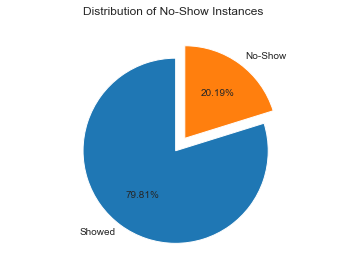

In [6]:
# 绘制一个饼状图
plt.pie(list(df['No-show'].value_counts()), labels=('Showed', 'No-Show'),
        explode=(0.1, 0.1), radius=1.2, autopct="%.2f%%", startangle=90)
plt.axis('equal')
plt.suptitle("Distribution of No-Show Instances")


 图中我们可以看到，病人们的平均失约率约为20.02%。

 ### 1.3 需要研究的问题

 在这份报告中，我们的目标非常清楚：找出可能与病人失约率相关的因素，为进一步解决问题打下基础。

 而为了理清为什么失约率高达20.02%，我们希望在本次报告中，通过：1）病人，2）日期，包括预约日期和就诊日期，3）街区这三个方向上的问题来探索。

     基于以上三个方向，我们决定在本报告中，将每个方向上的问题细化如下：

 - 病人
     - 每位病人预约多少次？失约多少次？
     - 预约次数更多的病人是否有更高的几率失约？
     - 是否存在有用户短时间多次预约，并最终选择一次前往（类似高铁抢票）？
     - 哪些属性会对失约率有影响？
         - 身患重病（数据集中采集的病症）的病人，与普通病人相比，是否有不同的失约率？
         - 不同年龄段的病人是否对失约率有影响？
         - 短信提醒功能，对哪些病人有什么作用？
 - 预约日期
     - 病人的等待时间于失约率之间，有没有关系？
 - 街区
     - 病人的失约率，是否与医院所在的街区有关联？

 在本报告中，所进行的所有数据清洗和分析工作，都是为了尝试解答上述问题，从而尽可能能最终回答，为什么失约率高达20.02%的情况。



 --------

 <a id='wrangling'></a>
 ## 2. 数据集探索和整理

 ### 2.1 常规属性

 我们观察发现，数据集的列名称有拼写错误：
 - "Hipertension"应为"Hypertension";
 - "Handcap"应为"Handicap".

 我们首先将修复上述错误。

 随后，我们将：
 - 探索数据集各列中的数据类型；
 - 探索数据集中的空值状况；
 - 查看对数据集各列的统计性描述并观察异常值；
 - 提取异常值并进行仔细观察，并决定后续操作

 #### 2.1.1 对数据集索引的调整：列名称中的拼写错误

In [7]:
# 修正列中的拼写错误，或不恰当的名称
df.rename(columns={'Hipertension': 'Hypertension',
                   'Handcap': 'Handicap'}, inplace=True)

df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


 #### 2.1.2 数据集数据类型

In [8]:
# 检查数据类型
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 通过以上信息我们可以初步判断：
 1） 数据没有行有单独的空值，看上去比较干净；
 2） 日期相关数据可能需要转换成datetimelike，以便进一步分析；
 3） No-show列可以转化为Boolean，以方便进行数据处理；
 4） PatientID应该是整数；

 ####  2.1.3 数据集条目的空值分布

In [9]:
# 检查数据集内，空值的计数之和
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

 很好。数据集本身没有条目是空值。

 #### 2.1.4 数据集各条目的唯一值分布

 Gender和涉及其他判断的列，如Scholarship, Hipertension, Diabetes, Alcoholism和SMS_recieved都应只有两个唯一值，Handicap列应该有数目有限的唯一值。

In [10]:
# 检查数据集唯一值情况,
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

 预约ID（AppointmentID）列下有110527个唯一值，与整个数据集的行数一致。也即，每一个预约ID都是唯一的。

 理论上，我们可以将预约ID作为整个数据集的索引。但这次的分析中我们不做这项操作，因为预约ID的计数会在整个分析过程中占据非常重要的地位，而相比之下，将其作为索引的好处几乎没有。

 #### 2.1.5 数据集各列的数值的统计性描述

In [11]:
# 检查数据集的数据分布状况

df.describe()

# 年龄最小值是-1，需要调查一下
# 年龄最大值是115，需要调查一下


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 ####  2.1.6 查看“年龄”列的异常值

In [12]:
# 检查年龄值为“-1”的行,查看是否属于异常
df_AgeAnomaly1 = df.query('Age == -1')
df_AgeAnomaly1


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


 基于以下理由，我们决定保留这项数据，尽管它会为年龄分层带来麻烦：
 - 其No-show列的数值显示，这位神秘的宝宝**已经前往医院就诊**，意味着这个数据是真实的；
 - 与其怀疑No-show列的数据错误，不如怀疑这是一个真实的案例（例如患有先天疾病，或者早产儿），或者是一个数据输入错误；
 - 每一个就诊数据都很关键
 - 数据上传者已经确认这是正确的数据

        来源：https://www.kaggle.com/joniarroba/noshowappointments/discussion/41457#238035

In [13]:
# 检查年龄值为“115”的行,查看是否属于异常
df_AgeAnomaly2 = df.query('Age == 115')
df_AgeAnomaly2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


 看上去数据很正常，有两位115岁的老人最终就诊了。符合逻辑，不对年龄做处理。

 #### 2.1.7 重复数据的发现，及对其影响的讨论

 但是，疑似有其他的异常情况。请仔细观察第63912和63915行。我们发现，这两行，除AppointmentID之外，各项数据完全一样！在预约时间精确到秒的前提之下都完全一样。

In [14]:
df_AgeAnomaly2.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


 最终，我们发现有非常隐蔽的重复数据！在2.1.6部分中，我们指出，第63912和63915行，除AppointmentID之外各项数据完全一样。

 也就是说，有可能同一个预约请求，因为某种原因，在1秒钟之内被请求了2次，甚至更多次。这明显不是人类的操作。而且，同样的数据，病人最终只会去1次，影响了失约率统计的准确性。

 为了进一步评估准确性，我们将以病人ID（PatientId)和性别（Gender)对用户进行分组，并统计每位病人的预约数，最后返回预约数的统计。

In [15]:
# 将PatientId列的浮点型数据转化为整数
df['PatientId'] = df['PatientId'].astype('int64')


def appointment_counts():
    '''将病人按照ID与性别分组，统计并返回病人预约数的唯一值及其计数'''
    reliacheck_p = df.groupby([df['PatientId'],
                               df['Gender']]).size().reset_index()
    reliacheck_p.rename(columns={0: 'Counts'}, inplace=True)
    reliacheck_p.sort_values('Counts', ascending=False, inplace=True)
    return reliacheck_p['Counts'].value_counts().sort_index()


appointment_counts().describe()


count       44.000000
mean      1415.886364
std       6062.388601
min          1.000000
25%          1.000000
50%          2.500000
75%         42.750000
max      37920.000000
Name: Counts, dtype: float64

 由上述返回的结果可知，部分用户存在明显大量的预约数，有可能是程序的错误操作所致。

 因此，我们将对上述重复行进行数据清洗，保证结果不被机器错误的异常干扰。

 #### 2.1.8 对数据集常规属性观察的小结

 在2.1部分中，我们对数据集的常规属性和显著的异常值进行了简单的探索和讨论，并发现数据集存在可能影响结论的隐藏重复数据。

 在分析过这类重复数据可能造成的影响后，我们发现，重复数据可能造成了少量用户大量的重复预约。因此我们将对重复数据进行清洗。清洗操作将在 2.2 部分中进行。

 ### 2.2 清理隐蔽的重复数据

 我们首先对重复数据进行检查，看看影响有多严重。

 目前看来，程序会自动生成AppointmentID，导致每一个AppontmentID都不一致，常规的筛查重复行的方法无法奏效。

 因此，根据“年龄”部分发现的规律，我们规定：当任意两行中，病人ID（PatientID）、预约日(ScheduledDay)、就诊日(AppointmentDay)、年龄（Age)和地区(Neighbourhood)都一致时，判定两列属于为重复数据。

 #### 2.2.1 检查重复数据

In [16]:
# 检查重复数据
df[df.duplicated(subset=[
    'PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
    'Neighbourhood'])].count()

# 发现还有1334行重复数据


PatientId         1334
AppointmentID     1334
Gender            1334
ScheduledDay      1334
AppointmentDay    1334
Age               1334
Neighbourhood     1334
Scholarship       1334
Hypertension      1334
Diabetes          1334
Alcoholism        1334
Handicap          1334
SMS_received      1334
No-show           1334
dtype: int64

 我们发现了1334行的重读数据

 #### 2.2.2 抛弃重复数据

In [17]:
# 去掉重复行
# 当PatientID，排期日期，预约日期，年龄和地区都一致时，判定两列属于为重复数据
# 设置inplace为True

df.drop_duplicates(['PatientId', 'Gender', 'ScheduledDay',
                    'AppointmentDay', 'Age', 'Neighbourhood'], inplace=True)


 重复行去除完成，现在重新带入病人们的预约计数，以检查去除重复行带来的影响。

In [18]:
appointment_counts().describe()


count       45.000000
mean      1384.422222
std       6038.034085
min          1.000000
25%          1.000000
50%          2.000000
75%         39.000000
max      38231.000000
Name: Counts, dtype: float64

 可以观察到，部分数据的计数出现了变化，为我们后续的分析排除掉一些干扰。

 #### 2.2.3 小结

 数据集本身没有什么重大问题，我们可以继续往下探索每列的数据。

 ### 2.3 对数据集各列的初步探索

In [19]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.091930e+05,1.091930e+05,109193.000000,109193.000000,109193.000000,109193.000000,109193.000000,109193.000000,109193.000000
mean,1.475156e+14,5.675754e+06,37.097003,0.098230,0.197375,0.071864,0.030496,0.022199,0.322869
std,2.560832e+14,7.116187e+04,23.140858,0.297626,0.398020,0.258263,0.171950,0.161109,0.467575
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176588e+12,5.640751e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680911e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439578e+13,5.725954e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 观察数据唯一值情况，我们还能发现如下规律：
 - 有病人多次预约；
 - 预约的时间各不相同，但预约就诊的天数显著的集中


 进一步观察现有数据集，我们发现，数据集中的自变量可以被初步划分为以下几类：

     1）病人ID（PatientId），预约ID（AppointmentID）等数值型数据
     2）性别（Gender），Scholarship，Hipertension, Diabetes, Alcoholism, Handicap和SMS_recieve都只有少数唯一值，应当作为分组依据；
     3）有大量唯一值，但分析时应当作为分组，需要进行进一步处理的数据，例如：年龄（Age）和日期类数据（包括预约日（ScheduledDay）和就诊日（AppointmentDay））。

 3）这类数据中，年龄这一数据较为特殊。尽管它有多个数值，但往往在分析过程中，他都被划分为不同的年龄层次加以分析。我们也将把年龄分组，并查看每一年龄组的相应数据。

 预约日(ScheduledDay)有大量唯一值，而就诊日(AppointmentDay)唯一值数量较少，这意味着大量的人等待了比较长的时间，因此，我们将计算等待时间，并观察等待时间的分布规律并对其分组。

 在2.3中，我们将按照上述分类方法，对不同的列采取不同的方法进行探索。

 #### 2.3.1 对数值型数据列的探索和处理

 #####  病人ID

In [20]:
# 检查病人ID的唯一值分布情况
df['PatientId'].nunique()



62299

In [21]:
# 病人的人均预约数（Average Appointments per Patient, APPP)
appp = len(df.index) / df['PatientId'].nunique()
appp


1.7527247628372846

 我们现在知道，我们一共有62299位病人，平均每位病人进行了1.75次预约。

 ##### 预约ID

In [22]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 109193 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         109193 non-null int64
AppointmentID     109193 non-null int64
Gender            109193 non-null object
ScheduledDay      109193 non-null object
AppointmentDay    109193 non-null object
Age               109193 non-null int64
Neighbourhood     109193 non-null object
Scholarship       109193 non-null int64
Hypertension      109193 non-null int64
Diabetes          109193 non-null int64
Alcoholism        109193 non-null int64
Handicap          109193 non-null int64
SMS_received      109193 non-null int64
No-show           109193 non-null object
dtypes: int64(9), object(5)
memory usage: 12.5+ MB


In [23]:
# 查看去重后的预约ID计数
df['AppointmentID'].nunique()


109193

 我们的数据集以供有109193行数据，我们也拥有109193个预约ID。

 正如前面所说，预约ID为唯一值。目前看来，预约ID在度里分析下，似乎没有可供继续挖掘的空间。

 #### 2.3.2 对分类型数据的探索

 目前为止，我们的分组对象都还以`object`的形式储存在数据集中。

 在进一步分析之前，我们不妨将其转化为pandas中的“类别”`category`这一数据类型，以方便后续的统计和分析。

In [24]:
# 通过'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received'
# 我们可以判别每个病人的基本分类
# 因此，将这些列转变为Pandas的Category数据类型

categories = ['Gender', 'Scholarship', 'Hypertension',
              'Handicap', 'Diabetes', 'Alcoholism', 'SMS_received']

for c in categories:
    df[c] = df[c].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109193 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         109193 non-null int64
AppointmentID     109193 non-null int64
Gender            109193 non-null category
ScheduledDay      109193 non-null object
AppointmentDay    109193 non-null object
Age               109193 non-null int64
Neighbourhood     109193 non-null object
Scholarship       109193 non-null category
Hypertension      109193 non-null category
Diabetes          109193 non-null category
Alcoholism        109193 non-null category
Handicap          109193 non-null category
SMS_received      109193 non-null category
No-show           109193 non-null object
dtypes: category(7), int64(3), object(4)
memory usage: 7.4+ MB


 考虑到分析需要进行大量的查询，我们定义以下函数：

In [25]:
# 获取每个分类的计数情况：
def value_count(inputs, labels, explode=(0.1, 0.1)):
    plt.pie(list(df[str(inputs)].value_counts()), labels=labels,
            explode=explode, radius=1.2, autopct="%.2f%%", startangle=90)
    plt.axis('equal') # 为了画出来不是莫名其妙的椭圆
    plt.suptitle("Distribution of Patients on {}".format(str(inputs),
                                                         fontweight="bold"))
    return df[str(inputs)].value_counts()


 #####  性别

F    70970
M    38223
Name: Gender, dtype: int64

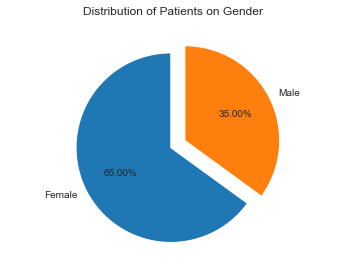

In [26]:
# 查看候诊病人中，性别人数的分布情况
value_count('Gender', ['Female', 'Male'])


 ##### 国家补助

0    98467
1    10726
Name: Scholarship, dtype: int64

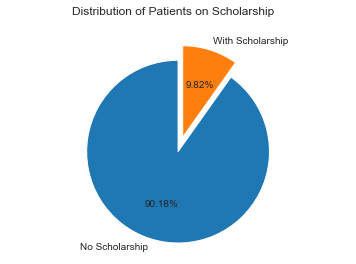

In [27]:
value_count('Scholarship', ['No Scholarship', 'With Scholarship'])


 只有大约10.89%的用户拥有补贴。

 ##### 高血压

0    87641
1    21552
Name: Hypertension, dtype: int64

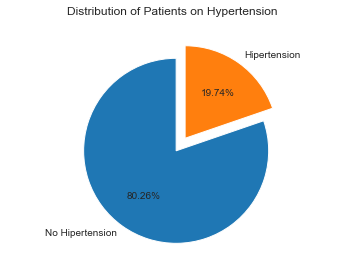

In [28]:
value_count('Hypertension', ['No Hipertension', "Hipertension"])


 ##### 糖尿病

0    101346
1      7847
Name: Diabetes, dtype: int64

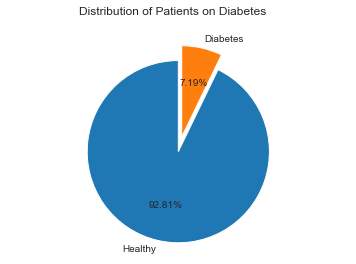

In [29]:
value_count('Diabetes', ['Healthy', 'Diabetes'])


 ##### 酗酒

0    105863
1      3330
Name: Alcoholism, dtype: int64

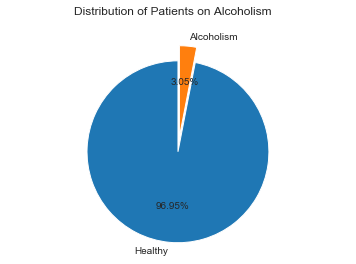

In [30]:
value_count('Alcoholism', ["Healthy", "Alcoholism"])


 ##### 伤残

In [31]:
df['Handicap'].value_counts()


0    106981
1      2017
2       181
3        11
4         3
Name: Handicap, dtype: int64

 看来重度残疾的人数比较少，保留4个分类显得没有必要。我们对数据集进行处理，使残疾分类仅仅保留“是/否”。

0    106981
1      2212
Name: Handicap_Y/N, dtype: int64

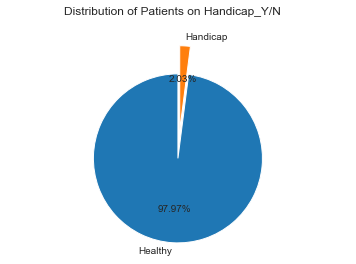

In [32]:
df['Handicap_Y/N'] = pd.cut(df['Handicap'],
                            bins=[-1, 0, 6],
                            right=True,
                            labels=[0, 1])

value_count('Handicap_Y/N', ['Healthy', 'Handicap'], explode=(0.2, 0.2))


 ##### 短信提醒

0    73938
1    35255
Name: SMS_received, dtype: int64

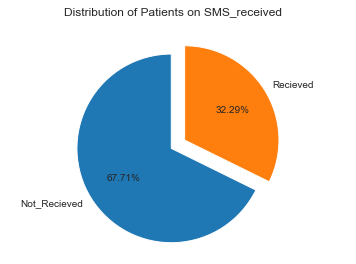

In [33]:
value_count('SMS_received', ["Not_Recieved", "Recieved"])


 #### 2.3.3  探索进一步处理后作为分组依据的数据

 ##### 年龄

 为了方便针对年龄的分析，我们将按照传统病人的年龄进行分组处理，为后续的分组分析做准备。

 |组名|年龄|
 | --- | --- |
 |儿童 Children | -1 - 6|
 |少年 Teen| 7 - 17 |
 |青年 Youth| 18 - 40 |
 |中年 Mid Aged| 41 - 65|
 |老年 Elders| 66+ |

In [34]:
# 创建年龄分组的索引
age_cate = ["Children: -1 - 6",
            "Teen: 7 - 17",
            "Youth: 18 - 40",
            "Mid Aged: 41 - 65",
            "Elders: 66+ "]

# 对数据集df内的等待时间进行分组，并在df内创建新的列储存这些值
# 使用cut分段时，分段方法为左开右闭
df['Age_Cate'] = pd.cut(df['Age'],
                        bins=[-2, 6, 17, 40, 65, 120],
                        right=True,
                        labels=age_cate)

df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65


In [35]:
# 创建针对年龄分组的数据透视表pivot_waitday
# 透视表将分别计算每个等待时长分类下，就诊和失约的预约病人数量
pivot_age = pd.pivot_table(df,
                           values=['AppointmentID'],
                           index=['Age_Cate'],
                           columns=['No-show'],
                           aggfunc=len)

# 所创建的是一个包含多重索引的数据透视表，需要去掉数据集列中多余的level
# https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index
pivot_age.columns = pivot_age.columns.droplevel(level=0)

# 计算每个等待时长分类下的预约总数
pivot_age['Total'] = pivot_age.sum(axis=1, numeric_only=True)

# 计算每个等待时长分类下，病人失约的比例
pivot_age['No-Show-Rate'] = pivot_age['Yes'] / pivot_age['Total']

# 显示最终的数据透视表pivot_waitday
pivot_age


No-show,No,Yes,Total,No-Show-Rate
Age_Cate,,,,
Children: -1 - 6,10686,2465,13151,0.187438
Teen: 7 - 17,10515,3431,13946,0.246020
Youth: 18 - 40,25268,7547,32815,0.229986
Mid Aged: 41 - 65,29691,6386,36077,0.177010
Elders: 66+,11172,2032,13204,0.153893


 ##### 日期：预约日 & 就诊日

 在提供的数据集中，日期有两列。分别为病人确定预约时间的日期(ScheduledDay)，和病人预约的就诊日期（AppointmentDay)。

 观察后，我们发现如下规律：
 - 就诊日的数据没有时间；显然所有人都午夜0：00就诊时不可能的；
 - 预约时间的唯一值多，而候诊日期的唯一值少；可能的原因有二：
     - 既有可能因为预约日因为有时间和日期两重维度，
     - 也有可能是因为病人预约的时间本身就有较大的跨度；

 基于以上规律，我们将：
 - 首先观察预约日和就诊日唯一值的分布情况；
 - 对预约日和就诊日进行数据类型转化，转化为datetimelike数据；
 - 紧接着，我们将分离预约日（ScheduledDay）中的时间数据，单独成列，原列中仅保留日期；
 - 随后，我们将重新观察预约日的唯一值情况，与就诊日的唯一值情况进行对比，并依次决定进一步行动

In [36]:
# 打印三行数据，查看预约日和就诊日的值的规律
# 可以看到，就诊日的数据没有时间
df.head(3)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65


In [37]:
# 查看预约日和就诊日的唯一值分布情况
print("ScheduledDay: {}, AppointmentDay: {}".format(
    df['ScheduledDay'].nunique(), df['AppointmentDay'].nunique()))



ScheduledDay: 103549, AppointmentDay: 27


In [38]:
# 将ScheduledDay 和 AppointmentDay，转化为datetime数据
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], utc=None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], utc=None)

# 将转化后的预约日(ScheduledDay)的时间数据新建列，名称为“ScheduledTime”
df['ScheduledTime'] = df['ScheduledDay'].dt.time

# 预约日(ScheduledDay)与就诊日(AppiontmentDay)列仅保留日期
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

# 再次转换经过处理的预约日(ScheduledDay)和就诊日(AppiontmentDay)列为datetime数据
# 两列数据都没有时区信息（pandas 0.24.0新增时区参数导致报错）
# https://pandas-docs.github.io/pandas-docs-travis/whatsnew/v0.24.0.html#whatsnew-0240-enhancements-interval
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], utc=None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], utc=None)

# 通过info()检验数据类型是否转换成功
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 109193 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         109193 non-null int64
AppointmentID     109193 non-null int64
Gender            109193 non-null category
ScheduledDay      109193 non-null datetime64[ns]
AppointmentDay    109193 non-null datetime64[ns]
Age               109193 non-null int64
Neighbourhood     109193 non-null object
Scholarship       109193 non-null category
Hypertension      109193 non-null category
Diabetes          109193 non-null category
Alcoholism        109193 non-null category
Handicap          109193 non-null category
SMS_received      109193 non-null category
No-show           109193 non-null object
Handicap_Y/N      109193 non-null category
Age_Cate          109193 non-null category
ScheduledTime     109193 non-null object
dtypes: category(9), datetime64[ns](2), int64(3), object(3)
memory usage: 8.4+ MB


In [39]:
# 统计去除时间之后的预约日唯一值，并与候诊日比较
print("ScheduledDay: {}, AppointmentDay: {}".format(
    df['ScheduledDay'].nunique(), df['AppointmentDay'].nunique()))


ScheduledDay: 111, AppointmentDay: 27


 基于以上，我们看到，人们在111个独立的日期，将自己的就诊时间预约在了27个日期。

 这意味着，不同日期预约的人们等待的时间有所不同，而等待时间的不同意味着病人最终就诊的几率也可能受到影响。

 我们必须计算出每位病人等待的时间，随后计算出每组等待时间病人的失约率，以此评估等待时间对病人失约率的影响。

In [40]:
# 计算每位病人的等待时间
df['WaitDays'] = df['AppointmentDay'] - df['ScheduledDay']

# 查看WaitDays列的统计性描述
df.describe()


,PatientId,AppointmentID,Age,WaitDays
count,1.091930e+05,1.091930e+05,109193.000000,109193
mean,1.475156e+14,5.675754e+06,37.097003,10 days 01:34:40.452043
std,2.560832e+14,7.116187e+04,23.140858,15 days 04:48:40.013793
min,3.921700e+04,5.030230e+06,-1.000000,-6 days +00:00:00
25%,4.176588e+12,5.640751e+06,18.000000,0 days 00:00:00
50%,3.172598e+13,5.680911e+06,37.000000,4 days 00:00:00
75%,9.439578e+13,5.725954e+06,55.000000,14 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,179 days 00:00:00


 观察df的统计行描述，我们发现，等待时间（WaitDays）列中有小于零的数据，这意味着病人在预约之前就已经完成就诊，明显属于异常值。


 我们将把这部分数据清理掉。

In [41]:
# 去除数据集中，等待时间（WaitDay)小于零的数据
df = df[df['WaitDays'] >= pd.to_timedelta(0)]

# 查看新数据集的统计性描述，以检查数据清洗的结果
df.describe()


,PatientId,AppointmentID,Age,WaitDays
count,1.091880e+05,1.091880e+05,109188.000000,109188
mean,1.475128e+14,5.675754e+06,37.097172,10 days 01:35:28.189910
std,2.560748e+14,7.116336e+04,23.140717,15 days 04:48:50.616001
min,3.921700e+04,5.030230e+06,-1.000000,0 days 00:00:00
25%,4.176524e+12,5.640750e+06,18.000000,0 days 00:00:00
50%,3.172598e+13,5.680912e+06,37.000000,4 days 00:00:00
75%,9.439578e+13,5.725956e+06,55.000000,14 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,179 days 00:00:00


 我们看到，经过处理的数据集中，等待时间(WaitDay)已经没有小于0天的数据。但是，带上了我们不需要的时分秒的尾巴。我们进一步处理这一列的数据，只留下天数。

In [42]:
# 去除WaitDay中的时间数据，只保留日期
df['WaitDays'] = df['WaitDays'].dt.days

# 打印数据集前5行查看结果
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate,ScheduledTime,WaitDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65,18:38:08,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:08:27,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:19:04,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17,17:29:31,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65,16:07:23,0


 在获得了每一位病人每一个订单的等待时间之后，我们自然而然要对每一组等待时间进行分组，并计算每一组的失约率，否则得到的数据过于碎片化，不利于分析。

 病人等待时间的最小值为0天，最大值为179天。我们按照日常生活中常见的，短期（能在语言上以相对日期表达的时间，例如：明天后天大后天），周（本周几，下周几），月（这个月几号），季（下/下下个月几号）和半年为单位，对病人们的等待时间进行分组。



 |分组名称 Wait Cate|等待时长 Number of Days|
 | :---: | :---: |
 |当天 Same Day|0|
 |短期 Short Time|1 - 3|
 |一周以内 A Week|4 - 7|
 |两周以内 Fortnight|8 - 14|
 |两周至一个月 A Month| 15 - 30|
 |一个月以上，一个季度以内 A Quarter| 31 - 90 |
 |一季度以上，半年以内 Half a Year|91 - 180|

In [43]:
# 创建等待时间分组的索引
waitday_cate = ["Same Day: 0",
                "Short Time: 1-3",
                "A Week: 4-7",
                "Fortnight: 8-14",
                "A Month: 15-30",
                "A Quarter: 31 - 90",
                "Half a Year: 91 - 180"]

# 对数据集df内的等待时间进行分组，并在df内创建新的列储存这些值
# 使用cut分段时，是分段方法为左开右闭
df['WaitCate'] = pd.cut(df['WaitDays'],
                        bins=[-2, 0, 3, 7, 14, 30, 90, 180],
                        right=True,
                        labels=waitday_cate)

df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate,ScheduledTime,WaitDays,WaitCate
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65,18:38:08,0,Same Day: 0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:08:27,0,Same Day: 0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:19:04,0,Same Day: 0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17,17:29:31,0,Same Day: 0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65,16:07:23,0,Same Day: 0


In [44]:
# 创建针对等待时长的数据透视表pivot_waitday
# 透视表将分别计算每个等待时长分类下，就诊和失约的预约病人数量
pivot_waitday = pd.pivot_table(df,
                               values=['AppointmentID'],
                               index=['WaitCate'],
                               columns=['No-show'],
                               aggfunc=len)

# 所创建的是一个包含多重索引的数据透视表，需要去掉数据集列中多余的level
# https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index
pivot_waitday.columns = pivot_waitday.columns.droplevel(level=0)

# 计算每个等待时长分类下的预约总数
pivot_waitday['Total'] = pivot_waitday.sum(axis=1, numeric_only=True)

# 计算每个等待时长分类下，病人没有失约的比例
pivot_waitday['No-Show-Rate'] = pivot_waitday['Yes'] / pivot_waitday['Total']

# 显示最终的数据透视表pivot_waitday
pivot_waitday


No-show,No,Yes,Total,No-Show-Rate
WaitCate,,,,
Same Day: 0,36711,1782,38493,0.046294
Short Time: 1-3,11230,3328,14558,0.228603
A Week: 4-7,12946,4347,17293,0.251373
Fortnight: 8-14,8200,3587,11787,0.304318
A Month: 15-30,11481,5512,16993,0.324369
A Quarter: 31 - 90,6603,3244,9847,0.329440
Half a Year: 91 - 180,161,56,217,0.258065


 ##### 街区

In [45]:
# 查看数据集内的街区数量
df['Neighbourhood'].nunique()


81

 数据集来源于巴西若干医院所分布的81个街区。我们对每个街区的预约ID计数进行视觉化探索。

Text(0.5, 0.98, 'Distribution of Appointments for Neighbourhoods')

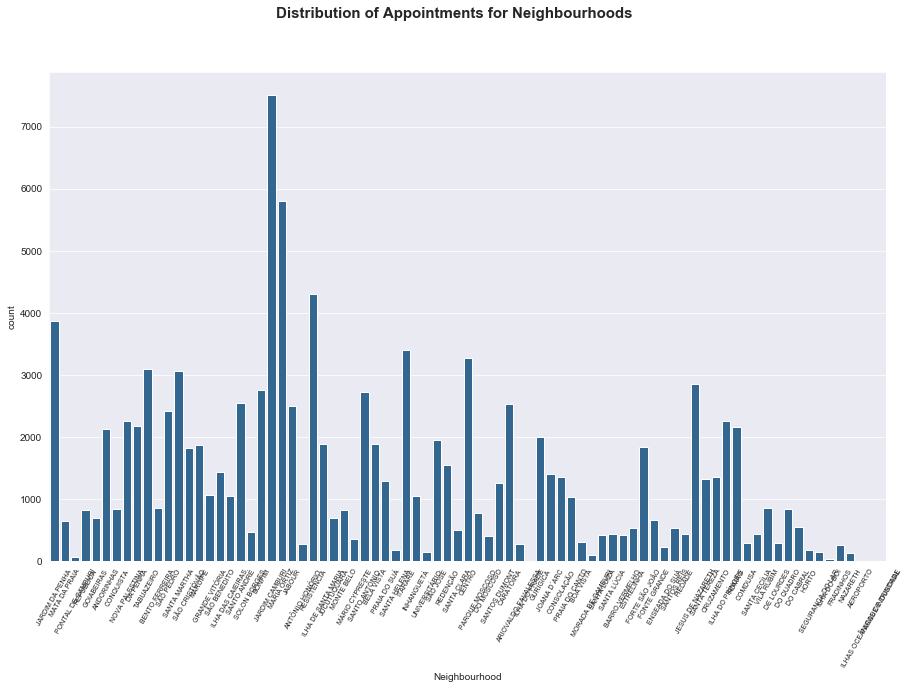

In [46]:
# 初始化图像并设定图片大小
plt.figure(figsize=(15, 9)).tight_layout()

# 使用seaborn的countplot绘图
fig_app_nbh = sns.countplot(
    x='Neighbourhood', data=df, orient='v', color='#2369A0')

# 获取x轴标签
x_labels = fig_app_nbh.get_xticklabels()

# 显示x轴标签
fig_app_nbh.set_xticklabels(x_labels, rotation=60, fontsize=7)

# 设定图片标题
plt.suptitle(
    'Distribution of Appointments for Neighbourhoods',
    fontweight="bold",
    fontsize=15)


 ### 2.4 小结：数据集探索和整理的阶段性成果

 在本节中，我们对数据集进行了初步的探索，清理了异常值，重复值，并根据需要转化了数据类型。不难发现，数据集中的样本，在绝大多数情况下都是失衡的。例如女性的人数显著多于男性，身患慢性疾病的人士相对较少。如果我们将病人按照他们的档案分组，我们理论上可以得到128个，甚至更多小组，并分别观察每个小组的行为。但事实就是，这些小组很可能有一部分样本容量太小，无法帮助我们的得出具有统计学意义的结论，也有可能有的小组根本不存在。

 尽管如此，我们将尝试继续分析。我们的主要策略将是：计算每个组别的失约率。即十月人数占该组别（无论分组方式）的百分比。在最终进入分析阶段之前，我们再看一看数据集的基本情况。

In [47]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 109188 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         109188 non-null int64
AppointmentID     109188 non-null int64
Gender            109188 non-null category
ScheduledDay      109188 non-null datetime64[ns]
AppointmentDay    109188 non-null datetime64[ns]
Age               109188 non-null int64
Neighbourhood     109188 non-null object
Scholarship       109188 non-null category
Hypertension      109188 non-null category
Diabetes          109188 non-null category
Alcoholism        109188 non-null category
Handicap          109188 non-null category
SMS_received      109188 non-null category
No-show           109188 non-null object
Handicap_Y/N      109188 non-null category
Age_Cate          109188 non-null category
ScheduledTime     109188 non-null object
WaitDays          109188 non-null int64
WaitCate          109188 non-null category
dtypes: category(10), datetime64[ns](2), int64(4), object(3)
memory usage: 14.

In [48]:
df.describe()



,PatientId,AppointmentID,Age,WaitDays
count,1.091880e+05,1.091880e+05,109188.000000,109188.000000
mean,1.475128e+14,5.675754e+06,37.097172,10.066298
std,2.560748e+14,7.116336e+04,23.140717,15.200586
min,3.921700e+04,5.030230e+06,-1.000000,0.000000
25%,4.176524e+12,5.640750e+06,18.000000,0.000000
50%,3.172598e+13,5.680912e+06,37.000000,4.000000
75%,9.439578e+13,5.725956e+06,55.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [49]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate,ScheduledTime,WaitDays,WaitCate
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65,18:38:08,0,Same Day: 0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:08:27,0,Same Day: 0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:19:04,0,Same Day: 0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17,17:29:31,0,Same Day: 0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65,16:07:23,0,Same Day: 0


In [50]:
# 保存清洗干净的数据集
df.to_csv('noshowappointments-kagglev2-may-2016_clean.csv', index=False)

 <a id='eda'></a>
 ## 3. 探索性数据分析
 ---


 ### 3.1 预约数量与失约率

 为了计算预约数量和失约率，我们需要首先以病人ID为索引，统计每一份病人ID预约了多少次，有多少次就诊，多少次失约。

 在此基础之上，我们需要对上述统计再做一次统计，以预约ID的总数为索引，统计每个ID计数的病人ID计数，并在此基础上No-Show情况进行计算。

 在这一切开始之前，我们注意到，根据2.1.1部分中对`df`各列数据类型的统计中, No-show列为` non-null object`，不方便我们进行后续处理。因此，首先我们将对其数据类型进行转换。

 我们将首先观察No-show列的数值构成，再决定如何进行转换。

In [51]:
# 打印df中，No-show列的前十列，观察数据构成
df['No-show'].head(10)


0     No
1     No
2     No
3     No
4     No
5     No
6    Yes
7    Yes
8     No
9     No
Name: No-show, dtype: object

 观察可知，No-show列的组成为No和Yes，类型是字符串。其中，No表示病人已经就诊，Yes表示病人未就诊（失约）。

 考虑到我们后续还要对No-show的数据进行加和运算，转换成Bool类型非常合适。

 转换成功后，我们将开始我们的分析。

In [52]:
# 对No-show列进行数据类型转换，由文本转换为布尔值，以方便加和运算和统计
df['No-show'] = df['No-show'].map({'Yes': True, 'No': False})
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 109188 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         109188 non-null int64
AppointmentID     109188 non-null int64
Gender            109188 non-null category
ScheduledDay      109188 non-null datetime64[ns]
AppointmentDay    109188 non-null datetime64[ns]
Age               109188 non-null int64
Neighbourhood     109188 non-null object
Scholarship       109188 non-null category
Hypertension      109188 non-null category
Diabetes          109188 non-null category
Alcoholism        109188 non-null category
Handicap          109188 non-null category
SMS_received      109188 non-null category
No-show           109188 non-null bool
Handicap_Y/N      109188 non-null category
Age_Cate          109188 non-null category
ScheduledTime     109188 non-null object
WaitDays          109188 non-null int64
WaitCate          109188 non-null category
dtypes: bool(1), category(10), datetime64[ns](2), int64(4), object(2)
memory usa

In [53]:
# 对df中的病人ID，预约ID和No-show三列进行数据透视，找出每个病人ID总的预约数，和相应的就诊后/失约次数
appt_count_per_id1 = pd.pivot_table(df,
                                    index=['PatientId'],
                                    values=['AppointmentID'],
                                    columns=['No-show'], aggfunc=len)

# 对取得的透视表进行进一步处理，为二次透视做准备
# 刚刚取得的数据透视表‘appt_count_per_id1’中，AppointmentID为多重索引列（MultiIndex），为方便后续操作，对其进行处理
# 我们首先对‘appt_count_per_id1’中，No-show为False和True的列进行加和运算，此时‘appt_count_per_id1’将转变为普通DataFrame
# 因为随后要以预约ID的计数作为索引再次透视，为方便后续操作，我们为‘appt_count_per_id1’重设Index，并将其保存为新的数据集‘appt_count_per_id2’
appt_count_per_id2 = appt_count_per_id1.sum(axis=1, level=1).reset_index()

# 现在，‘appt_count_per_id2’名为False和True的两列名称，还是Bool值。为方便后续进行操作，将Bool值名称更改为字符串
appt_count_per_id2.rename(
    columns={False: 'Showed', True: 'No_Show'}, inplace=True)

# 为‘appt_count_per_id2’增加预约ID的总数，为后续的数据分析打下基础
appt_count_per_id2['TotalAppointments'] = appt_count_per_id2['No_Show'] +     appt_count_per_id2['Showed']

# 为方便回答问题2和3，对数据集进行按照失约次数和就诊次数排序降序排序
appt_count_per_id2.sort_values(
    ['No_Show', 'Showed'], ascending=False, inplace=True)

# 查看以病人ID为基础的，统计总预约数和失约次数的数据集“appt_count_per_id2”
appt_count_per_id2.head(10)



No-show,PatientId,Showed,No_Show,TotalAppointments
10725,1421986987763,0.0,18.0,18.0
55395,563513528548171,0.0,16.0,16.0
18178,5587789811398,5.0,15.0,20.0
55680,581197334462339,0.0,14.0,14.0
39659,65751443779385,0.0,13.0,13.0
10291,1198157171975,11.0,12.0,23.0
25451,9715135545613,9.0,11.0,20.0
50410,249163747571517,7.0,11.0,18.0
13104,2728422248149,4.0,11.0,15.0
5909,476861615941,1.0,11.0,12.0


In [54]:
# 查看以病人ID为基础的，统计总预约数和失约次数的数据集的统计性描述
appt_count_per_id2.describe()


No-show,PatientId,Showed,No_Show,TotalAppointments
count,6.229900e+04,62299.000000,62299.000000,62299.000000
mean,1.471711e+14,1.401820,0.350824,1.752645
std,2.549091e+14,1.603825,0.668979,1.742309
min,3.921700e+04,0.000000,0.000000,1.000000
25%,4.176937e+12,1.000000,0.000000,1.000000
50%,3.198866e+13,1.000000,0.000000,1.000000
75%,9.484809e+13,2.000000,1.000000,2.000000
max,9.999816e+14,87.000000,18.000000,88.000000


 从结果上看，确实有少部分人经历过多次预约，但只就诊了少数几次。

 问题中所提出的，类似中国春运时大规模抢票再退票的情况，从数据集的统计行描述来看不广泛的存在，不应作为重点研究对象。

 我们按照既定计划，对数据上述进行再次透视。

In [55]:
# 对以病人ID为基础的，统计总预约数和失约次数的数据集“appt_count_per_id2”再次进行透视
# 此次透视，以统计不同预约总数的病人ID计数，并计算病人就诊/失约的次数，以回答问题4
# 透视以新加入的“TotalAppointments”作为索引，对“PatientId"列进行计数运算，"Showed"和"No_Show"列进行加和运算，得到新数据集pivot_appCount
pivot_appCount = pd.pivot_table(
    appt_count_per_id2,
    index=['TotalAppointments'],
    values=['PatientId', 'No_Show', 'Showed'],
    aggfunc={
        'PatientId': len,
        'Showed': sum,
        'No_Show': sum
    })

# 重设索引，将“TotalAppointments”列作为单独的列
pivot_appCount.reset_index(inplace=True)

# 将所得列表的值的类型更改为整数（int)
pivot_appCount2 = pivot_appCount.astype('int64', copy=False)

# 分别对总人次，No-show和失约的比例进行计算
pivot_appCount2['Total'] = pivot_appCount2['PatientId'] *     pivot_appCount2['TotalAppointments']
pivot_appCount2['No_Show_PCT'] = (
    pivot_appCount2['No_Show'] / pivot_appCount2['Total']) * 100
pivot_appCount2['Showed_PCT'] = pivot_appCount2['Showed'] /     pivot_appCount2['Total'] * 100
pivot_appCount2['Total_PCT'] = pivot_appCount2['No_Show_PCT'] +     pivot_appCount2['Showed_PCT']

pivot_appCount2


,TotalAppointments,No_Show,PatientId,Showed,Total,No_Show_PCT,Showed_PCT,Total_PCT
0,1,7229,38232,31003,38232,18.908244,81.091756,100.0
1,2,5726,13868,22010,27736,20.644650,79.355350,100.0
2,3,3333,5431,12960,16293,20.456638,79.543362,100.0
3,4,2041,2339,7315,9356,21.814878,78.185122,100.0
4,5,1074,1047,4161,5235,20.515759,79.484241,100.0
5,6,652,509,2402,3054,21.349050,78.650950,100.0
6,7,485,291,1552,2037,23.809524,76.190476,100.0
7,8,272,166,1056,1328,20.481928,79.518072,100.0
8,9,190,100,710,900,21.111111,78.888889,100.0
9,10,158,81,652,810,19.506173,80.493827,100.0


 得到表格后，对进行视觉化处理。

Text(0.5, 1.02, 'No-Show on Patient Appointment Counts')

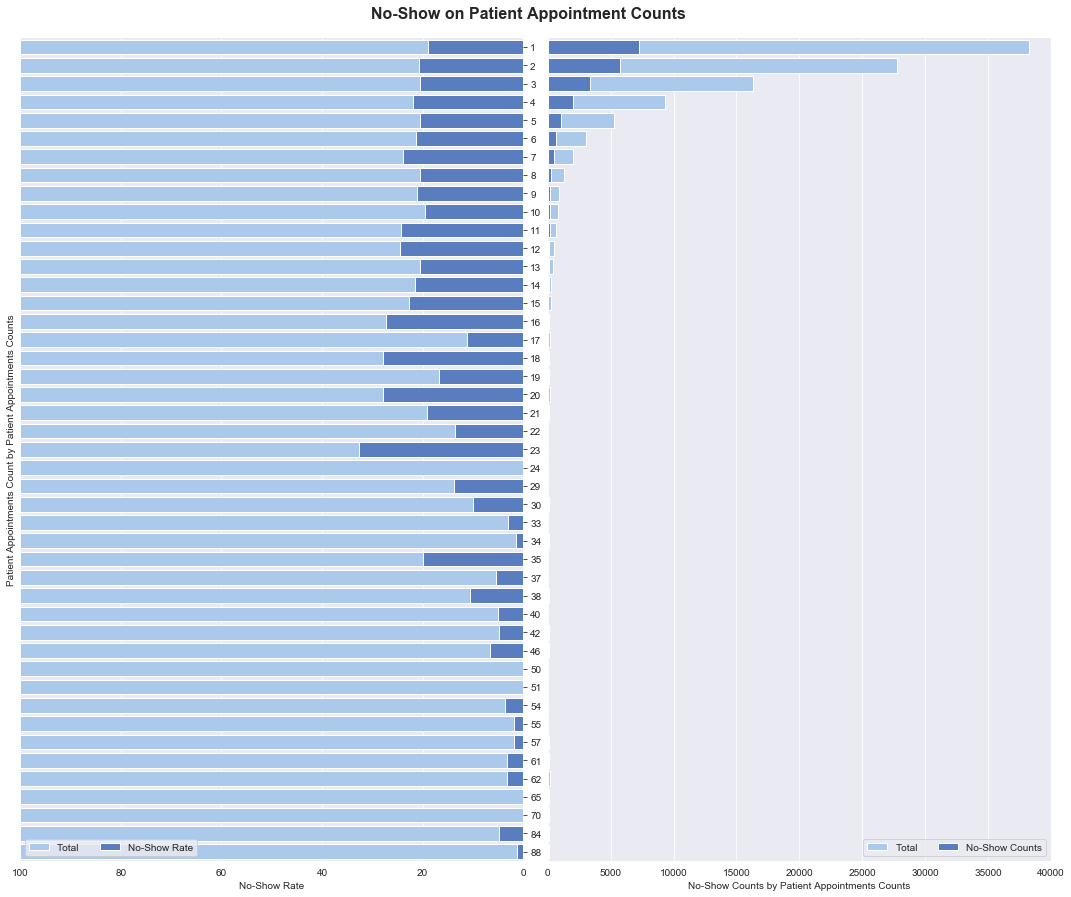

In [56]:
# 图像初始化
fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 12))

# 为所绘图像启用紧凑布局
fig1.tight_layout()

# ---------------------------------------------------------------------------------

# 绘制No-Show的比例
# 绘制100%的情景，作为背景
sns.set_color_codes("pastel")
sns.barplot(x='Total_PCT', y='TotalAppointments',
            data=pivot_appCount2, label="Total", orient='h', color="b", ax=ax1)

# 绘制失约的病人比例
sns.set_color_codes("muted")
sns.barplot(x='No_Show_PCT', y='TotalAppointments', data=pivot_appCount2,
            label="No-Show Rate", orient='h', color="b", ax=ax1)

# 绘制图例，轴标题
ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 100),
        xlabel="No-Show Rate",
        ylabel="Patient Appointments Count by Patient Appointments Counts")
sns.despine(left=True, bottom=True, ax=ax1)

# 将Y轴至于左边图像的右侧，并反转X轴，使最终图像看起来类似于漏斗图
ax1.yaxis.set_ticks_position('right')
ax1.invert_xaxis()

# ---------------------------------------------------------------------------------

# 绘制病人的总数
# 绘制就诊的病人数
sns.set_color_codes("pastel")
sns.barplot(x='Total', y='TotalAppointments', data=pivot_appCount2,
            label="Total", color="b", orient='h', ax=ax2)

# 绘制失约的病人数
sns.set_color_codes("muted")
sns.barplot(x='No_Show', y='TotalAppointments', data=pivot_appCount2,
            label="No-Show Counts", color="b", orient='h', ax=ax2)

# 绘制图例，轴标题
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 40000), ylabel="",
        xlabel="No-Show Counts by Patient Appointments Counts")
sns.despine(left=True, bottom=True, ax=ax2)

# ---------------------------------------------------------------------------------

# 设置全图大标题，并使其较初始位置高一点
plt.suptitle('No-Show on Patient Appointment Counts',
             fontsize=16, fontweight="bold", y=1.02)


 观察上述图像可以发现，预约数量较少的病人雀氏由相对更小的几率失约。失约率随着预约次数的增加不断增加，由最初的18.91%不断攀升，大约到23次时达到峰值32.61%。预约次数达到25次及以上的病人，失约率几乎是所有人中最低的。

 因此，在病人的预约数量小于等于23次的情况下，其预约次数越多，失约几率越高。但一旦病人的预约次数在此基础上再增加，那么失约率就会降低。

 同时，失约率变化情况稳定，似乎没有用户在短时间内多次预约并只选择其中的1，2次前往的情况。

 尽管我们总结出了一条可能的规律，但这条规律不能告诉我们23次的神奇魔力究竟在哪里。23次，24次为什么能为病人们的失约率划出一条结界呢？这个问题凭借数据集中已有的数据，恐怕无法解答。

 ### 3.2 预约后的等待时间与病人失约率之间的关系

In [57]:
waitday_plot = pivot_waitday.copy().reset_index()

waitday_plot



No-show,WaitCate,No,Yes,Total,No-Show-Rate
0,Same Day: 0,36711,1782,38493,0.046294
1,Short Time: 1-3,11230,3328,14558,0.228603
2,A Week: 4-7,12946,4347,17293,0.251373
3,Fortnight: 8-14,8200,3587,11787,0.304318
4,A Month: 15-30,11481,5512,16993,0.324369
5,A Quarter: 31 - 90,6603,3244,9847,0.329440
6,Half a Year: 91 - 180,161,56,217,0.258065


[Text(867.275, 0.5, 'No Show Rate (Lower the Better)')]

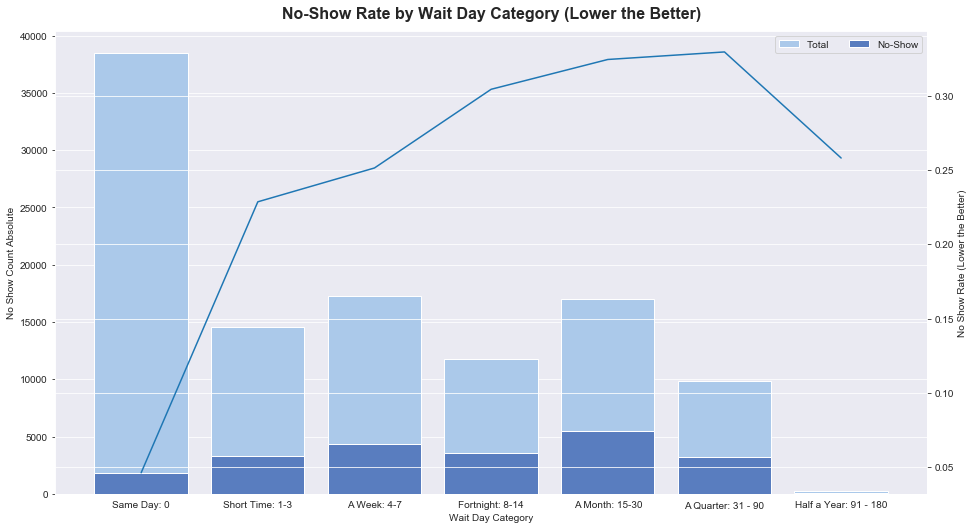

In [58]:
# 针对上述表格，绘制分布图像
fig2, absolute = plt.subplots(sharex=True, sharey=False, figsize=(13, 7))
ratio = absolute.twinx()
fig2.tight_layout()

# 为全图添加标题，且标题较图向上一点
plt.suptitle('No-Show Rate by Wait Day Category (Lower the Better)',
             fontweight='bold', fontsize=16, y=1.02)

# 绘制反应总人数和失约病人的条状图absolute
# 绘制总病人数，以浅色显示
sns.set_color_codes("pastel")
sns.barplot(x='WaitCate', y='Total',
            data=waitday_plot, label='Total', ax=absolute, color='b')

# 绘制失约人数，以深色显示
sns.set_color_codes("muted")
sns.barplot(x='WaitCate', y='Yes',
            data=waitday_plot, label='No-Show', ax=absolute, color='b')
absolute.set(xlabel='Wait Day Category',
             ylabel='No Show Count Absolute')  # 坐标轴文案
absolute.legend(ncol=3, loc='upper right', frameon=True)  # 图例

# 绘制反映失约人数比例的折线图
sns.lineplot(x='WaitCate', y='No-Show-Rate', data=waitday_plot,
             legend='full', ax=ratio)
ratio.set(ylabel='No Show Rate (Lower the Better)')  # 坐标轴文案


 通过查看病人预约后的等待时间图像，我们清楚的看到，病人们的等待时间越长失约率越高。

 在病人等待时间为0，即当天预约当天就诊的情况下，失约率仅4.6%；而等待时间再1-3天时，失约率就飙升至22.86%，并随着等待时间的加长进一步扩大到峰值：在病人等待近一个季度时，失约率提高到了32.94%。但是，等待时间更长的病人的失约率反而下降了，等待近半年的病人，失约率最终会落到25%左右。这可能是因为这些人长期患病，需要定期看医生。

### 3.3 病人年龄分类与失约率的关系

In [59]:
age_plot = pivot_age.copy().reset_index()

age_plot

No-show,Age_Cate,No,Yes,Total,No-Show-Rate
0,Children: -1 - 6,10686,2465,13151,0.187438
1,Teen: 7 - 17,10515,3431,13946,0.246020
2,Youth: 18 - 40,25268,7547,32815,0.229986
3,Mid Aged: 41 - 65,29691,6386,36077,0.177010
4,Elders: 66+,11172,2032,13204,0.153893


[Text(867.275, 0.5, 'No Show Rate (Lower the Better)')]

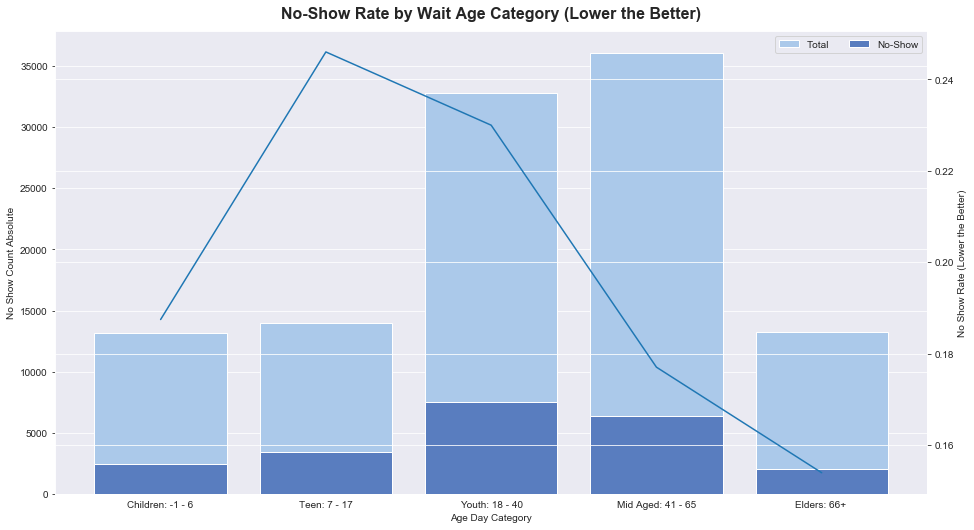

In [60]:
# 针对上述表格，绘制分布图像
fig7, absolute = plt.subplots(sharex=True, sharey=False, figsize=(13, 7))
ratio = absolute.twinx()
fig7.tight_layout()

# 为全图添加标题，且标题较图向上一点
plt.suptitle('No-Show Rate by Wait Age Category (Lower the Better)',
             fontweight='bold', fontsize=16, y=1.02)

# 绘制反应总人数和失约病人的条状图absolute
# 绘制总病人数，以浅色显示
sns.set_color_codes("pastel")
sns.barplot(x='Age_Cate', y='Total',
            data=age_plot, label='Total', ax=absolute, color='b')

# 绘制失约人数，以深色显示
sns.set_color_codes("muted")
sns.barplot(x='Age_Cate', y='Yes',
            data=age_plot, label='No-Show', ax=absolute, color='b')
absolute.set(xlabel='Age Day Category',
             ylabel='No Show Count Absolute')  # 坐标轴文案
absolute.legend(ncol=3, loc='upper right', frameon=True)  # 图例

# 绘制反映失约人数比例的折线图
sns.lineplot(x='Age_Cate', y='No-Show-Rate', data=age_plot,
             legend='full', ax=ratio)
ratio.set(ylabel='No Show Rate (Lower the Better)')  # 坐标轴文案

 ### 3.4 探索病人档案与病人失约率之间的关系

 在 2.3.2 中，我们通过转换数据集的字段类型将病人分了类。我们用以将病人分为不同类别的几大要素，究竟有没有因素会导致病人的失约率显著的降低/升高呢？我们需要对数据集中的分类标准进行探索。

 我们首先会对数据中所有的概率情况进行绘图，得出非常直观的图像。随后，我们将探索每一个细分标准的，观察数据细节，强化我们的结论。

 我们首先使用`seaborn`的`PairGrid`图像为每一个分类标准进行绘图。

 我们将因变量`df['No-show']`作为唯一的Y轴，并将`'Gender', 'Scholarship', 'Hypertension','Diabetes','Alcoholism', 'SMS_received', 'Handicap_Y/N'`这些维度作为X轴，比较依照这些维度分类，No-show列的平均值情况。

 我们之所以能认为这些维度的平均值就是病人的失约率，是因为`df['No-show']`的数值已经提前被我们转换成了Boolean，在计算时会被当做0（`False`)或1(`True`)。

 #### 3.4.1 对单个分类变量的失约率观察

Text(0.5, 1.02, 'No_Show Rate by Categories (Lower the Better)')

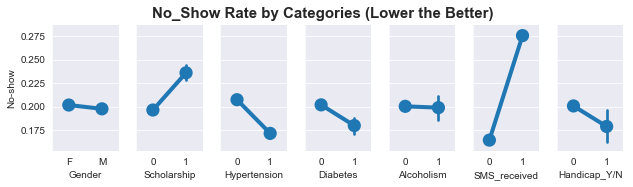

In [61]:
# 绘制总览图像
noshow_cate = sns.PairGrid(df, y_vars=['No-show'],
                           x_vars=['Gender', 'Scholarship', 'Hypertension', 'Diabetes',
                                   'Alcoholism', 'SMS_received', 'Handicap_Y/N'],
                           aspect=0.5)

noshow_cate.map(sns.pointplot, scale=1.5)

plt.suptitle('No_Show Rate by Categories (Lower the Better)', y=1.02,
             fontweight='bold', fontsize=15)


 观察上述图像，我们很容易观察到以下三个现象：
 - 两个因素似乎显著得提升了失约率：1）短信提醒，2）国家补助；收到短信提醒的病人由显著更高的几率失约，而享受国家补助的人由较高的概率失约；
 - 身患重疾的人似乎有更低的失约率，可能他们确实需要医生的长期照料。我们观察到，拥有：1）高血压，2）糖尿病，3）残疾，这三种特质的病人，由显著较低的几率失约；
 - 有一些因素对是否失约没有显著的影响，二者之间的差距微乎其微：1)性别;2)酗酒。

 在观察到按分类计算的失约率的大致分布后，让我们看看每个类别具体的数据。


 为了更快捷的判断每个分类与病人失约率的关系，我们定义如下查询函数。有了这个函数，我们就能在仅仅输入查询的分类标准（列名称）和图示中不同类别所用的标签后，就能自动返回一个计算了病人失约率的列表，和一张反映情况的直方图。

In [62]:
# 定义探索病人失约率的函数
def noshow_rel(query_column, x_labels):
    """
    此函数将不同的查询组别与no-show的情况进行分组，
    可接受的两个参数：1为用于分组的列名称，2为绘图时x轴的刻度名称。
    将分别计算每个组别中，show/no-show的人的占比，
    计算每个组别在总人数中的占比，
    最终返回包含上述占比的dataframe
    并按照我们的要求绘制图像；
    """
    # 分类
    df_name = df['AppointmentID'].groupby(
        [df[str(query_column)], df['No-show']]).size().unstack()

    # 重命名列（否则列名称还是Boolean)
    df_name.rename(columns={False: 'Showed', True: 'No_Show'}, inplace=True)

    # 计算总数
    df_name['Total'] = df_name['Showed'] + df_name['No_Show']

    # 计算占比
    df_name['No_Show_PCT'] = df_name['No_Show'] / df_name['Total'] * 100

    # ---------------------------------------------------------------------

    # 绘图前准备
    showed_subcat = df_name['Showed']
    no_showed_subcat = df_name['No_Show']
    # tick_labels = df_name['No_Show_PCT']
    x_index = [1, 2]
    # width = 0.06

    # 绘图
    p1 = plt.bar(x_index, showed_subcat)
    p2 = plt.bar(x_index, no_showed_subcat)

    # 标签，图例，刻度
    plt.xticks(x_index, x_labels)
    plt.legend((p1[0], p2[0]), ('Showed', 'No_Show'))
    plt.suptitle('Show/No-Show Distribution for {}'.format(str(query_column)),
                 fontweight='bold', fontsize=14)

    return df_name


 ##### 性别（失约率差距不大）

No-show,Showed,No_Show,Total,No_Show_PCT
Gender,,,,
F,56661,14306,70967,20.158665
M,30671,7550,38221,19.753539


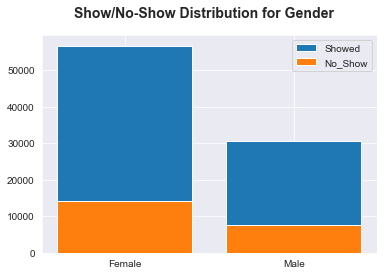

In [63]:
noshow_rel('Gender', ('Female', 'Male'))


 ##### 国家补助（判断为真时，失约率提高）

No-show,Showed,No_Show,Total,No_Show_PCT
Scholarship,,,,
0,79137,19325,98462,19.626861
1,8195,2531,10726,23.596867


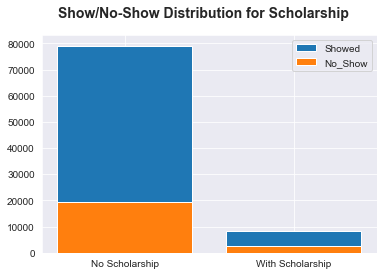

In [64]:
noshow_rel('Scholarship', ('No Scholarship', 'With Scholarship'))


 ##### 高血压（判断为真时，失约率降低）

No-show,Showed,No_Show,Total,No_Show_PCT
Hypertension,,,,
0,69473,18163,87636,20.725501
1,17859,3693,21552,17.135301


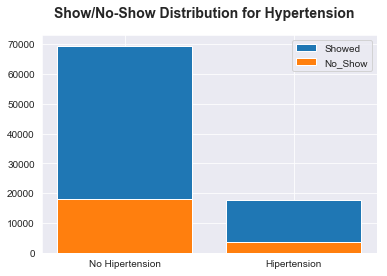

In [65]:
noshow_rel('Hypertension', ('No Hipertension', 'Hipertension'))


 ##### 糖尿病（判断为真时，失约率降低）

No-show,Showed,No_Show,Total,No_Show_PCT
Diabetes,,,,
0,80895,20446,101341,20.175447
1,6437,1410,7847,17.968650


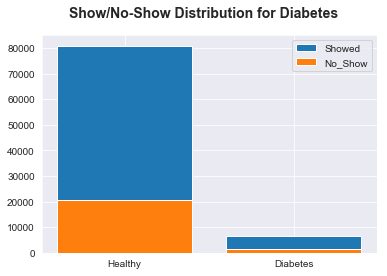

In [66]:
noshow_rel('Diabetes', ('Healthy', 'Diabetes'))


 ##### 酗酒（失约率差距不大）

No-show,Showed,No_Show,Total,No_Show_PCT
Alcoholism,,,,
0,84664,21194,105858,20.02116
1,2668,662,3330,19.87988


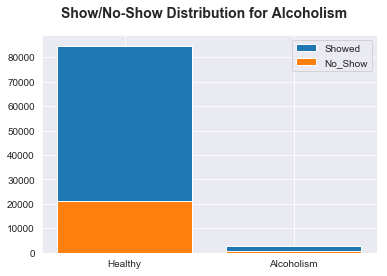

In [67]:
noshow_rel('Alcoholism', ('Healthy', 'Alcoholism'))


 ##### 短信提醒（判断为真时，失约率提高）

No-show,Showed,No_Show,Total,No_Show_PCT
SMS_received,,,,
0,61794,12139,73933,16.418920
1,25538,9717,35255,27.562048


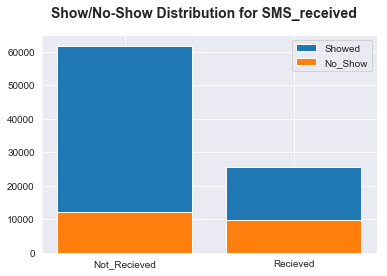

In [68]:
noshow_rel('SMS_received', ("Not_Recieved", "Recieved"))


 ##### 伤残（判断为真时，失约率降低）

No-show,Showed,No_Show,Total,No_Show_PCT
Handicap_Y/N,,,,
0,85517,21461,106978,20.061134
1,1815,395,2210,17.873303


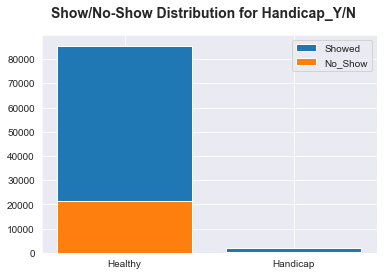

In [69]:
noshow_rel('Handicap_Y/N', ('Healthy', 'Handicap'))


 ##### 小结

 通过观察具体数据，我们能够细化我们在本节开头发现的规律：

     单个观察每一个分类时，
     - 短信提醒显著的提高失约率（差距约为11.15%），接受国家补助稍微提高失约率（3.97%）；
     - 身患重疾的人由相对更低的失约率：高血压患者低3.59%，糖尿病患者低2.21%，伤残患者降低2.19%；
     - 酗酒和和性别对失约率影响很小，我们不对男性的失约率比女性低0.41%，和酗酒你不酗酒的人的四月率低0.14%做更深入的探讨。

 接下来，我们综合运用这些分类标准，将病患分成 2^7共128个子类别，并分别统计每个子类别的失约率，并查看人数较多，且失约率较高的群体特征。

#### 3.4.2 用户细分，与每个细分群体的失约率

 我们若想达到目的，需要：
 - 获取一张涵盖包含多层分类的数据透视表，将人群分成128个小群组；
 - 整理该透视表，使我们通过数据透视表计算所有的小分类的失约率；
 - 利用得到的包含每个小群组失约率的透视表，以该群组所有人作为x轴，以No-Show人数作为Y轴，画一张表明散点图来说明每个小群组失约率之间的关系。
 - 我们将观察散点图的点的斜率。斜率越高，则失约率越高。
 - 根据观察的结果，进一步观察和理解 3.3.1中的结论。

In [70]:
# 创建一张将人群分为小群组的数据透视表
pivot_cate = pd.pivot_table(df,
                            values=['AppointmentID'],
                            index=['Gender', 'Scholarship', 'Hypertension',
                                   'Diabetes', 'Alcoholism', 'Handicap_Y/N',
                                   'SMS_received', 'Age_Cate'],
                            columns=['No-show'],
                            aggfunc=len)

# 将No-Show中，尚为Bool值的True和False改名，方便后续检索
pivot_cate.rename(columns={False: 'Showed', True: 'No_Show'}, inplace=True)

# 重塑数据透视表，使之成为一个具有多重索引的Series
pivot_cate2 = pivot_cate.unstack().unstack().unstack(
).unstack().unstack().unstack().unstack().unstack()

# 填充NaN值，填入0
pivot_cate2.fillna(value=0, inplace=True)

# 重新整理pivot_cate2的索引，去掉一层以方便检索
pivot_cate2.index = pivot_cate2.index.droplevel(level=0)

# ---------------------------------------------------------------

# 分别提取Showed和No-Show的列，并转换成DataFrame
series_showed = pivot_cate2.loc['Showed'].to_frame()
series_noshow = pivot_cate2.loc['No_Show'].to_frame()

# 将上述两个分别包含了Showed和No-Show信息的DataFrame使用merge方法，按照各自的索引合并；
# 合并方式选择Outer，以最大程度包括Showed和No-Show所包含的极端情况（100% Showed/No-Show）
df_PatientCate = series_showed.merge(series_noshow, how='outer',
                                     left_index=True, right_index=True)

# 修改合并后的列名称
df_PatientCate.rename(
    columns={'0_x': 'Showed', '0_y': 'No_Show'}, inplace=True)

# ---------------------------------------------------------------

# 计算每一细分类别的总人数和失约率
df_PatientCate['Total'] = df_PatientCate['Showed'] + df_PatientCate['No_Show']
df_PatientCate['No_Show_PCT'] = df_PatientCate['No_Show'] /     df_PatientCate['Total']

# 为上一步产生的NaN值填入0
df_PatientCate.fillna(value=0, inplace=True)

# 筛选出群组总人数大于500，且失约率大于平均水平0的数据，以便分析只用
df_PatientCate.query('No_Show_PCT > 0 & Total > 500', inplace=True)

# 将得到的数据集按失约率由高到低排序
df_PatientCate.sort_values(
    by=['No_Show_PCT', 'Total'], axis=0, ascending=False, inplace=True)

# 打印得到的数据集
df_PatientCate.head(3)



Showed  \
Age_Cate       SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender           
Youth: 18 - 40 1            0            0          0        0            1           F        851.0   
                                                                          0           M       1477.0   
                                                                                      F       4415.0   

                                                                                              No_Show  \
Age_Cate       SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender            
Youth: 18 - 40 1            0            0          0        0            1           F         475.0   
                                                                          0           M         779.0   
                                                                                      F        2126.0   

                                                                                               Total  \
Age_Cate       SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender           
Youth: 18 - 40 1            0            0          0        0            1           F       1326.0   
                                                                          0           M       2256.0   
                                                                                      F       6541.0   

                                                                                              No_Show_PCT  
Age_Cate       SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender               
Youth: 18 - 40 1            0            0          0        0            1           F          0.358220  
                                                                          0           M          0.345301  
                                                                                      F          0.325027

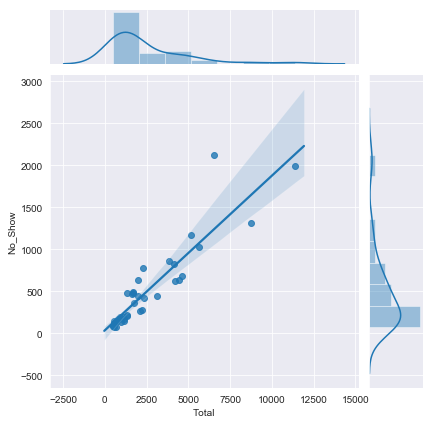

In [71]:
# 绘制是散点图
fig3 = sns.JointGrid(x='Total', y='No_Show', data=df_PatientCate)
fig3 = fig3.plot_joint(sns.regplot)
fig3 = fig3.plot_marginals(sns.distplot)


 观察绘制的图表，我们发现4个点显著的高于回归直线和其他点的斜率。为了更好的探究这些数据，我们新令一张透视表，并从中筛选出失约率大于数据集平均值0.2002的行，并在此基础之上，筛选出总预约数多于500的群组，从而观察他们的特征。

In [72]:
df_PatientCate2 = df_PatientCate.query('No_Show_PCT > 0.2002 & Total > 500')
df_PatientCate2


Showed  \
Age_Cate          SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender           
Youth: 18 - 40    1            0            0          0        0            1           F        851.0   
                                                                             0           M       1477.0   
                                                                                         F       4415.0   
Teen: 7 - 17      1            0            0          0        0            0           F       1346.0   
Children: -1 - 6  1            0            0          0        0            0           F       1130.0   
                                                                                         M       1220.0   
Teen: 7 - 17      1            0            0          0        0            0           M       1228.0   
                  0            0            0          0        0            1           M        417.0   
Mid Aged: 41 - 65 1            0            0          0        1            0           M        498.0   
                                                                0            0           F       3974.0   
Teen: 7 - 17      0            0            0          0        0            0           M       2961.0   
Mid Aged: 41 - 65 1            0            0          0        0            0           M       1545.0   
Elders: 66+       1            0            0          1        1            0           F        417.0   
Mid Aged: 41 - 65 1            0            0          1        1            0           F        464.0   
Elders: 66+       1            0            0          0        1            0           F        698.0   
Teen: 7 - 17      0            0            0          0        0            1           F        637.0   
Mid Aged: 41 - 65 1            0            0          0        1            0           F       1392.0   

                                                                                                 No_Show  \
Age_Cate          SMS_received Handicap_Y/N Alcoholism Diabetes Hypertension Scholarship Gender            
Youth: 18 - 40    1            0            0          0        0            1           F         475.0   
                                                                             0           M         779.0   
                                                                                         F        2126.0   
Teen: 7 - 17      1            0            0          0        0            0           F         636.0   
Children: -1 - 6  1            0            0          0        0            0           F         473.0   
                                                                                         M         487.0   
Teen: 7 - 17      1            0            0          0        0            0           M         485.0   
                  0            0            0          0        0            1           M         152.0   
Mid Aged: 41 - 65 1            0            0          0        1            0           M         150.0   
                                                                0            0           F        1167.0   
Teen: 7 - 17      0            0            0          0        0            0           M         859.0   
Mid Aged: 41 - 65 1            0            0          0        0            0           M         447.0   
Elders: 66+       1            0            0          1        1            0           F         118.0   
Mid Aged: 41 - 65 1            0            0          1        1            0           F         129.0   
Elders: 66+       1            0            0          0        1            0           F         190.0   
Teen: 7 - 17      0            0            0          0        0            1           F         171.0   
Mid Aged: 41 - 65 1            0            0          0        1            0           F         364.0   

          

 我们观察到失约率的排名前六的群组情况如下：
 - 第一：收到短信，享受补助，健康青年女性，1326人次，35.82%
 - 第二：收到短信，健康青年男性，2256人次，34.5%
 - 第三：收到短信，健康青年女性，6541人次，32.50%
 - 第四：收到短信，健康少年女性，1982人次，32.08%
 - 第五：收到短信，健康儿童女性，1603人次，29.50%
 - 第六，收到短信，健康儿童男性，1707人次，28.53%

 由此看来，各个年龄层的健康人，因为收到短信而没能前往的几率显著的高；而享受国家补助的人，只是在这一失约率基础之上提高了一些失约率而已。

 ### 3.5 所在街区与失约率之间的关系

 接下来我们观察一下，失约率和医院所在区域之间的关系。

In [73]:
# 生成针对每个街区病患失约率的数据透视表

pivot_neighbourhood = pd.pivot_table(df,
                                     index=['Neighbourhood'],
                                     values=['AppointmentID'],
                                     columns=['No-show'], aggfunc=len)

# 去掉一层索引，方便检索数据集
pivot_neighbourhood.columns = pivot_neighbourhood.columns.droplevel(level=0)

# 将身为Bool值作为列名称的True和False改名，方便检索数据集
pivot_neighbourhood.rename(
    columns={False: 'Showed', True: 'No_Show'}, inplace=True)

# 将NaN数值填充为0
pivot_neighbourhood.fillna(value=0, inplace=True)

# 将所得列表的值的类型更改为整数（int)
pivot_neighbourhood2 = pivot_neighbourhood.astype('int64', copy=False)

# 分别对总人次，No-show和失约的比例进行计算
pivot_neighbourhood2['Total'] = pivot_neighbourhood2['Showed'] +     pivot_neighbourhood2['No_Show']
pivot_neighbourhood2['No_Show_PCT'] = (
    pivot_neighbourhood2['No_Show'] / pivot_neighbourhood2['Total']) * 100
pivot_neighbourhood2['Showed_PCT'] = pivot_neighbourhood2['Showed'] /     pivot_neighbourhood2['Total'] * 100
pivot_neighbourhood2['Total_PCT'] = pivot_neighbourhood2['No_Show_PCT'] +     pivot_neighbourhood2['Showed_PCT']

pivot_neighbourhood2.fillna(value=0)

# 处理表格的索引列，准备绘图
pivot_neighbourhood2.reset_index(inplace=True)

pivot_neighbourhood2.query('No_Show_PCT > 20')



No-show,Neighbourhood,Showed,No_Show,Total,No_Show_PCT,Showed_PCT,Total_PCT
1,ANDORINHAS,1663,473,2136,22.144195,77.855805,100.0
3,ARIOVALDO FAVALESSA,218,62,280,22.142857,77.857143,100.0
4,BARRO VERMELHO,331,91,422,21.563981,78.436019,100.0
6,BENTO FERREIRA,664,189,853,22.157093,77.842907,100.0
9,CARATOÍRA,1950,579,2529,22.894425,77.105575,100.0
10,CENTRO,2591,687,3278,20.957901,79.042099,100.0
14,CRUZAMENTO,1072,293,1365,21.465201,78.534799,100.0
18,DO MOSCOSO,316,91,407,22.358722,77.641278,100.0
20,ENSEADA DO SUÁ,183,52,235,22.127660,77.872340,100.0
22,FONTE GRANDE,521,145,666,21.771772,78.228228,100.0


In [74]:
pivot_neighbourhood2.describe()



No-show,Showed,No_Show,Total,No_Show_PCT,Showed_PCT,Total_PCT
count,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01
mean,1078.172840,269.827160,1348.000000,20.450094,79.549906,1.000000e+02
std,1081.491653,269.596912,1346.235938,9.728187,9.728187,5.024296e-15
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+02
25%,316.000000,69.000000,407.000000,17.840376,78.436019,1.000000e+02
50%,707.000000,177.000000,850.000000,19.701727,80.298273,1.000000e+02
75%,1554.000000,421.000000,2005.000000,21.563981,82.159624,1.000000e+02
max,6109.000000,1401.000000,7510.000000,100.000000,100.000000,1.000000e+02


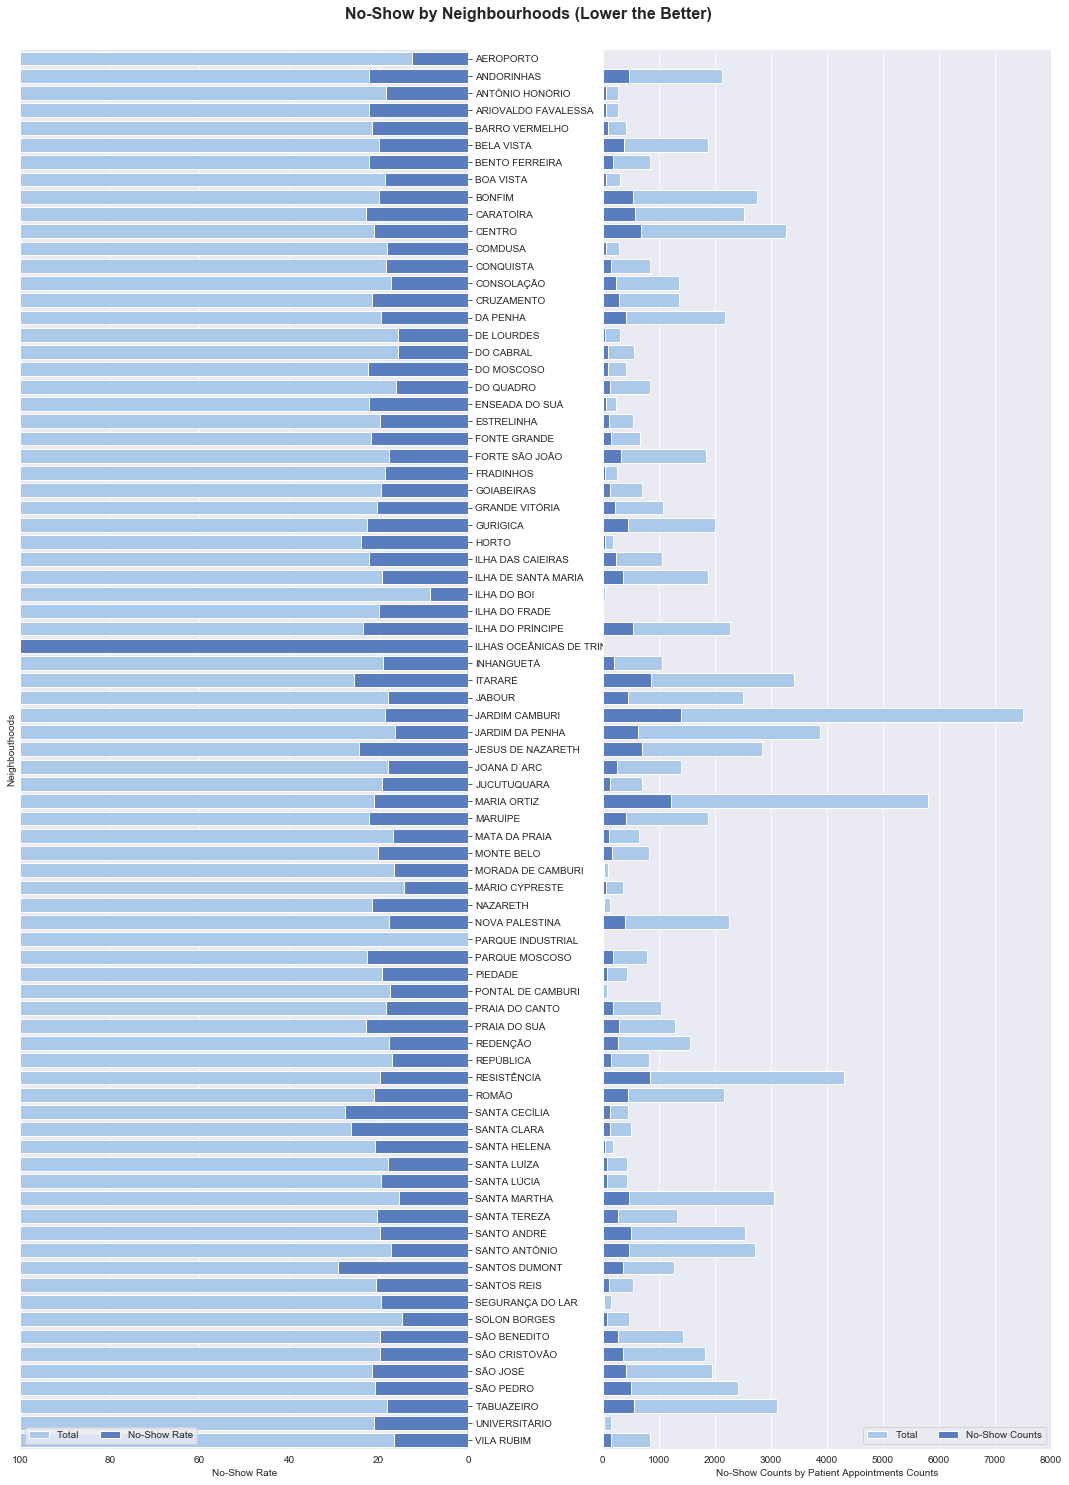

In [75]:
# 绘图1：比例和绝对值
# 图像初始化
fig4, (ratio, absolute) = plt.subplots(1, 2, sharey=True, figsize=(15, 20))

# 为所绘图像启用紧凑布局
fig4.tight_layout()

# ---------------------------------------------------------------------------------

# 绘制No-Show的比例
# 绘制100%的情景，作为背景
sns.set_color_codes("pastel")
sns.barplot(x='Total_PCT', y='Neighbourhood', data=pivot_neighbourhood2,
            label="Total", orient='h', color="b", ax=ratio)

# 绘制未失约的病人比例
sns.set_color_codes("muted")
sns.barplot(x='No_Show_PCT', y='Neighbourhood', data=pivot_neighbourhood2,
            label="No-Show Rate", orient='h', color="b", ax=ratio)

# 绘制图例，轴标题
ratio.legend(ncol=2, loc="lower left", frameon=True)
ratio.set(xlim=(0, 100),
          xlabel="No-Show Rate",
          ylabel="Neighbouthoods")
sns.despine(left=True, bottom=True, ax=ratio)

# 将Y轴至于左边图像的右侧，并反转X轴，使最终图像看起来类似于漏斗图
ratio.yaxis.set_ticks_position('right')
ratio.invert_xaxis()

# ---------------------------------------------------------------------------------

# 绘制病人的总数
# 绘制就诊的病人数
sns.set_color_codes("pastel")
sns.barplot(x='Total', y='Neighbourhood', data=pivot_neighbourhood2,
            label="Total", color="b", orient='h', ax=absolute)

# 绘制失约的病人数
sns.set_color_codes("muted")
sns.barplot(x='No_Show', y='Neighbourhood', data=pivot_neighbourhood2,
            label="No-Show Counts", color="b", orient='h', ax=absolute)

# 绘制图例，轴标题
absolute.legend(ncol=2, loc="lower right", frameon=True)
absolute.set(xlim=(0, 8000), ylabel="",
             xlabel="No-Show Counts by Patient Appointments Counts")
sns.despine(left=True, bottom=True, ax=absolute)

# ---------------------------------------------------------------------------------

# 设置全图大标题，并使其较初始位置高一点
plt.suptitle('No-Show by Neighbourhoods (Lower the Better)',
             fontsize=16, fontweight="bold", y=1.02)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.3, hspace=None)


 我们观察到，每个地区的失约人数或有不同，但失约的整体比例是相近的。除去一个地区失约率为100%外，且该地区只有2个案例之外，只有34个街区的失约率超过了20%。最高29%，绝大多数都只是略超一点。

 从地区上看失约率，看不出显著的规律。诚然部分失约率较高的地区需要想办法降低自身相对较高的失约率，但基于已有的数据我们在此无法给出建议。

 ### 3.6 上述变量之间的相互关系

 #### 3.6.1 病人居住地 vs. 等待时长

 接下来，我们将观察每个地区不同等待时长的病人，失约率的分布情况。

 要达到这一目的，我们需要首先创建一张以街区和预约等待市场为分组依据，以No-Show为列，统计各分组下预约ID的计数。随后，我们将计算每个地区每个等待时间分类下，失约人数占总人数的比例，并最终绘制一张热力图将数据可视化。

In [76]:
# 将数据集按照病人居住地和等待时长分组
pivot_nbhvswdc = pd.pivot_table(df,
                                index=['Neighbourhood', 'WaitCate'],
                                values=['AppointmentID'],
                                columns=['No-show'], aggfunc=len)

# 将身为Bool值作为列名称的True和False改名，方便检索数据集
pivot_nbhvswdc.rename(columns={False: 'Showed', True: 'No_Show'}, inplace=True)

# 重塑数据集，并为缺失值NaN填入0
pivot_nbhvswdc2 = pivot_nbhvswdc.unstack()
pivot_nbhvswdc2.fillna(value=0, inplace=True)

# ---------------------------------------------------------------------------------

# 计算pivot_nbhvswdc2每一列输入占该行加和的比例
pivot_nbhvswdc_PCT = pivot_nbhvswdc2.div(
    pivot_nbhvswdc2.sum(axis=1), axis=0) * 100

# 去掉一层索引方便操作
pivot_nbhvswdc_PCT.columns = pivot_nbhvswdc_PCT.columns.droplevel(level=0)

# 只筛选出;No-Show的相关数据
pivot_nbhvswdc_PCT = pivot_nbhvswdc_PCT['No_Show']

pivot_nbhvswdc_PCT.head(3)



WaitCate,Same Day: 0,Short Time: 1-3,A Week: 4-7,Fortnight: 8-14,A Month: 15-30,A Quarter: 31 - 90,Half a Year: 91 - 180
Neighbourhood,,,,,,,
AEROPORTO,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.0
ANDORINHAS,1.404494,3.136704,4.915730,4.073034,6.367041,2.247191,0.0
ANTÔNIO HONÓRIO,2.583026,0.369004,2.583026,1.107011,9.594096,2.214022,0.0


Text(0.5, 1.02, 'No-Show Rate Distribution by Neighbourhoods and Wait Day Categories')

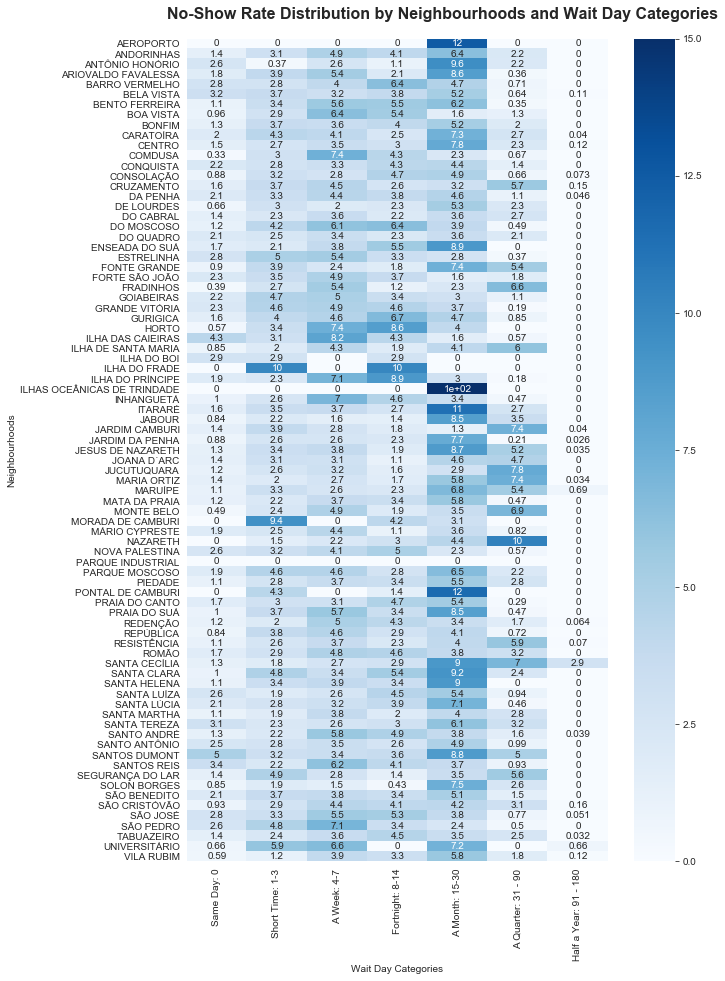

In [77]:
# 绘图
# 初始化
fig5, nbhvswdc_PCT = plt.subplots(figsize=(8, 12))
fig5.tight_layout()

# 绘制图形
sns.heatmap(pivot_nbhvswdc_PCT, vmax=15.0, annot=True,
            xticklabels='auto', yticklabels='auto', cmap='Blues',
            ax=nbhvswdc_PCT)

# 设定轴标题等
nbhvswdc_PCT.set(
    xlabel="Wait Day Categories",
    ylabel="Neighbourhoods")
sns.despine(left=True, bottom=True, ax=nbhvswdc_PCT)

# 为图命名
plt.suptitle('No-Show Rate Distribution by Neighbourhoods and Wait Day Categories',
             fontsize=16, fontweight='bold', y=1.02)


 观察图像，我们不难发现如下规律：
 - 相较于其他时间段，绝大多数地区的绝大多数失约都集中在等待15-30天的区间内
 - 15-30天的等待时长分类中，由20各街区由多于占自身人次计数7%的病人失约
 - 少部分地区确实存在其他时间段失约率较高的情况，但似乎不具备普遍规律。

 至此，我们总结出如下规律：

     - 相较于地区而言，失约于时间的关系更大；
     - 等待15-30天的病人失约率是所有病人中最高的

 接下来，我们探索等待时长于病人分组之间的关系。

 #### 3.6.2 等待时长 vs. 病人分类

 接下来，我们将观察不同类型的病人，再等待时长上的区别。我们最终希望看到的，是一张热力图：一根轴标明等待时长的分组，另一根轴标明病人档案中的种种属性，而热力图中的方格，将填入病人分布情况的数据。

 这一次，我们需要将原本转化为`category`的列转化为`boolean`，才能比较方便的对数值进行计算。

 为了不影响之前的数据，我们首先需要新建一张新表，去除掉我们不需要的部分，然后根据我们的需要进行转换。随后，我们将使用新表进行数据透视，并通过整理和计算得到我们需要的占比数据，最后完成绘图。

In [78]:
# 建立新表并整理
pivot_pcvswdc1 = df.copy()

pivot_pcvswdc1.drop(labels=['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'WaitDays',
                            'ScheduledTime', 'Handicap'], axis=1, inplace=True)

# 转换数据类型
categories = ['Scholarship', 'Hypertension', 'Handicap_Y/N',
              'Diabetes', 'Alcoholism', 'SMS_received']

for c in categories:
    pivot_pcvswdc1[c] = pivot_pcvswdc1[c].map({1: True, 0: False})

# ---------------------------------------------------------------------------------
#建立数据透视表；年龄列的计算规则为计算平均数，其他均为累计计数
pcvswdc_groupby = pd.pivot_table(pivot_pcvswdc1,
                                 index=['No-show', 'WaitCate'],
                                 columns=[],
                                 values=['AppointmentID', 'Scholarship', 'Age',
                                         'Hypertension', 'Handicap_Y/N',
                                         'Diabetes', 'Alcoholism', 'SMS_received'],
                                 aggfunc={'AppointmentID': len,
                                          'Scholarship': sum, # 此处之前有错误，为np.mean，已改正
                                          'Age': np.mean,
                                          'Hypertension': sum,
                                          'Handicap_Y/N': sum,
                                          'Diabetes': sum,
                                          'Alcoholism': sum,
                                          'SMS_received': sum})

# 重命名以方便索引
pcvswdc_groupby.rename(index={False: 'Showed', True: 'No_Show'}, inplace=True)

pcvswdc_groupby



Age  Alcoholism  AppointmentID  Diabetes  \
No-show WaitCate                                                                
Showed  Same Day: 0            34.743020      1482.0          36711    2466.0   
        Short Time: 1-3        43.514693       293.0          11230    1193.0   
        A Week: 4-7            41.024409       360.0          12946    1142.0   
        Fortnight: 8-14        36.717073       199.0           8200     557.0   
        A Month: 15-30         37.635833       241.0          11481     729.0   
        A Quarter: 31 - 90     39.785249        92.0           6603     328.0   
        Half a Year: 91 - 180  63.248447         1.0            161      22.0   
No_Show Same Day: 0            28.353535        56.0           1782      88.0   
        Short Time: 1-3        39.477764       120.0           3328     343.0   
        A Week: 4-7            36.420060       170.0           4347     325.0   
        Fortnight: 8-14        32.475606       103.0           3587     213.0   
        A Month: 15-30         32.842525       141.0           5512     285.0   
        A Quarter: 31 - 90     33.455302        70.0           3244     149.0   
        Half a Year: 91 - 180  53.714286         2.0             56       7.0   

                               Handicap_Y/N  Hypertension  SMS_received  \
No-show WaitCate                                                          
Showed  Same Day: 0                   857.0        6518.0           0.0   
        Short Time: 1-3               287.0        3106.0         710.0   
        A Week: 4-7                   257.0        3201.0        8064.0   
        Fortnight: 8-14               144.0        1604.0        5004.0   
        A Month: 15-30                182.0        2306.0        7334.0   
        A Quarter: 31 - 90             78.0        1040.0        4324.0   
        Half a Year: 91 - 180          10.0          84.0         102.0   
No_Show Same Day: 0                    71.0         236.0           0.0   
        Short Time: 1-3                84.0         778.0         193.0   
        A Week: 4-7                    77.0         820.0        2541.0   
        Fortnight: 8-14                45.0         583.0        1957.0   
        A Month: 15-30                 77.0         798.0        3114.0   
        A Quarter: 31 - 90             36.0         445.0        1875.0   
        Half a Year: 91 - 180           5.0          33.0          37.0   

                               Scholarship  
No-show WaitCate                            
Showed  Same Day: 0                 3938.0  
        Short Time: 1-3              846.0  
        A Week: 4-7                 1123.0  
        Fortnight: 8-14              855.0  
        A Month: 15-30              1048.0  
        A Quarter: 31 - 90           376.0  
        Half a Year: 91 - 180          9.0  
No_Show Same Day: 0                  245.0  
        Short Time: 1-3              320.0  
        A Week: 4-7                  518.0  
        Fortnight: 8-14              506.0  
        A Month: 15-30               648.0  
        A Quarter: 31 - 90           289.0  
        Half a Year: 91 - 180          5.0

In [79]:
# 计算每一格在每一列中的占比
pcvswdc_PCT = pcvswdc_groupby.div(pcvswdc_groupby.sum(axis=0), axis=1) * 100

# 数据集被分成了“Showed”和"No-Show"两大部分，直接绘图恐怕难以区分
# 我们将一个数据集按照“Showed”和"No-Show"切片，并分别保存为两个数据集
pcvswdc_PCT_showed = pcvswdc_PCT.loc['Showed']
pcvswdc_PCT_noshow = pcvswdc_PCT.loc['No_Show']

pcvswdc_PCT



Age  Alcoholism  AppointmentID  \
No-show WaitCate                                                      
Showed  Same Day: 0             6.278014   44.504505      33.621827   
        Short Time: 1-3         7.863043    8.798799      10.285013   
        A Week: 4-7             7.413052   10.810811      11.856614   
        Fortnight: 8-14         6.634723    5.975976       7.509983   
        A Month: 15-30          6.800741    7.237237      10.514892   
        A Quarter: 31 - 90      7.189138    2.762763       6.047368   
        Half a Year: 91 - 180  11.428904    0.030030       0.147452   
No_Show Same Day: 0             5.123443    1.681682       1.632047   
        Short Time: 1-3         7.133576    3.603604       3.047954   
        A Week: 4-7             6.581053    5.105105       3.981207   
        Fortnight: 8-14         5.868296    3.093093       3.285160   
        A Month: 15-30          5.934597    4.234234       5.048174   
        A Quarter: 31 - 90      6.045325    2.102102       2.971022   
        Half a Year: 91 - 180   9.706095    0.060060       0.051288   

                                Diabetes  Handicap_Y/N  Hypertension  \
No-show WaitCate                                                       
Showed  Same Day: 0            31.426023     38.778281     30.243133   
        Short Time: 1-3        15.203262     12.986425     14.411656   
        A Week: 4-7            14.553332     11.628959     14.852450   
        Fortnight: 8-14         7.098254      6.515837      7.442465   
        A Month: 15-30          9.290175      8.235294     10.699703   
        A Quarter: 31 - 90      4.179941      3.529412      4.825538   
        Half a Year: 91 - 180   0.280362      0.452489      0.389755   
No_Show Same Day: 0             1.121448      3.212670      1.095026   
        Short Time: 1-3         4.371097      3.800905      3.609874   
        A Week: 4-7             4.141710      3.484163      3.804751   
        Fortnight: 8-14         2.714413      2.036199      2.705085   
        A Month: 15-30          3.631961      3.484163      3.702673   
        A Quarter: 31 - 90      1.898815      1.628959      2.064774   
        Half a Year: 91 - 180   0.089206      0.226244      0.153118   

                               SMS_received  Scholarship  
No-show WaitCate                                          
Showed  Same Day: 0                0.000000    36.714525  
        Short Time: 1-3            2.013899     7.887376  
        A Week: 4-7               22.873351    10.469886  
        Fortnight: 8-14           14.193731     7.971285  
        A Month: 15-30            20.802723     9.770651  
        A Quarter: 31 - 90        12.264927     3.505501  
        Half a Year: 91 - 180      0.289321     0.083908  
No_Show Same Day: 0                0.000000     2.284169  
        Short Time: 1-3            0.547440     2.983405  
        A Week: 4-7                7.207488     4.829387  
        Fortnight: 8-14            5.550986     4.717509  
        A Month: 15-30             8.832790     6.041395  
        A Quarter: 31 - 90         5.318395     2.694387  
        Half a Year: 91 - 180      0.104950     0.046616

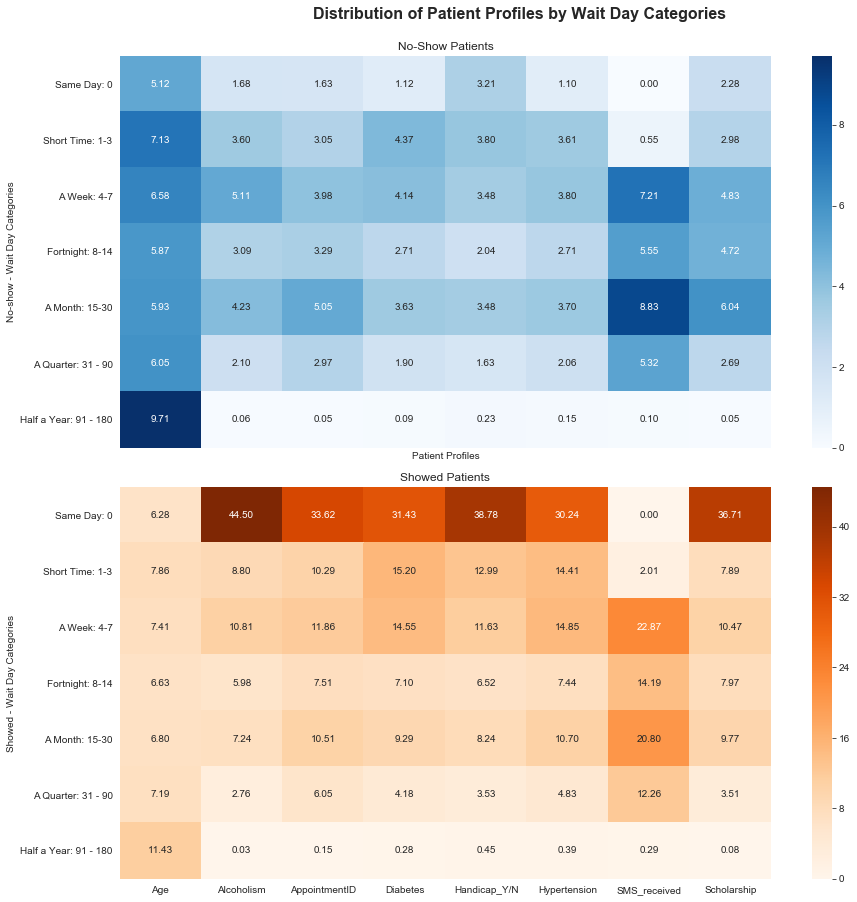

In [80]:
# 画一张包含子图的图形，将两个数据集的情况都体现出来
fig6, (pc_noshow, pc_showed) = plt.subplots(
    2, 1, figsize=(12, 12), sharex=True)
fig6.tight_layout()

# 履约病人的热力图绘制
sns.heatmap(pcvswdc_PCT_showed, annot=True,
            fmt='.2f', cmap='Oranges', ax=pc_showed)
pc_showed.set(xlabel="", ylabel='Showed - Wait Day Categories',
              title='Showed Patients')

# 失约病人的热力图绘制
sns.heatmap(pcvswdc_PCT_noshow, annot=True, fmt='.2f',
            xticklabels='auto', yticklabels='auto', cmap='Blues',
            ax=pc_noshow)
pc_noshow.set(xlabel='Patient Profiles', ylabel='No-show - Wait Day Categories',
              title='No-Show Patients')

# 图像名称即其他参数设定
plt.suptitle('Distribution of Patient Profiles by Wait Day Categories',
             fontsize=16, fontweight='bold', y=1.04)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=0.1)


 观察之后我们发现：
 - 等待15-30天的病人，依旧相对容易失约；
 - 享受国家补贴的病人，相对容易失约；
 - 收到短信的病人主要集中在等待3天以上到一季的时间范围之内。尽管有70%左右的病人在收到短信之后正常前往就诊，但剩下的失约病人比例依然很高。
 - 从热力图上看来，长时间等待后收到短信的病人失约率较高，是失约最主要的因素。

## 4. 使用机器学习构建病人失约情况的预测模型

### 4.1 数据集导入，训练集与测试集分开

In [81]:
df_clean = pd.read_csv('noshowappointments-kagglev2-may-2016_clean.csv')
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate,ScheduledTime,WaitDays,WaitCate
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65,18:38:08,0,Same Day: 0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:08:27,0,Same Day: 0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:19:04,0,Same Day: 0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17,17:29:31,0,Same Day: 0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65,16:07:23,0,Same Day: 0


In [82]:
# 保留需要的特征数据集
kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays', 'Age'] 
df_features = df_clean[kept_columns].copy()

In [83]:
df_features.head()

,Scholarship,Diabetes,Alcoholism,WaitDays,Age
0,0,0,0,0,62
1,0,0,0,0,56
2,0,0,0,0,62
3,0,0,0,0,8
4,0,1,0,0,56


In [84]:
# 保留需要的标签数据集
df_labels = df_clean['No-show'].map({"Yes":1, "No":0})

In [85]:
df_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [86]:
# 使用KFold区分训练集和测试集
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df_features):
    features_train, features_test = df_features.loc[train_index], df_features.loc[test_index]
    labels_train, labels_test = df_labels.loc[train_index], df_labels.loc[test_index]

### 4.2 sklearn逻辑回归

In [87]:
lm = LogisticRegression(penalty='l2', C=1e9, fit_intercept=True, intercept_scaling=1, random_state=42, solver='lbfgs', max_iter=300, class_weight="balanced")
# lm = LogisticRegression(penalty='l1', C=1e9, fit_intercept=True, intercept_scaling=1, random_state=42, max_iter=300)
lm.fit(features_train, labels_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [88]:
lm.score(features_test, labels_test)

0.6902504922837386

In [89]:
lm.coef_

array([[ 0.23276735,  0.11003401,  0.15496348,  0.03293769, -0.00724937]])

In [90]:
labels_pred = lm.predict(features_test)
print("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
print("Precision:",metrics.precision_score(labels_test, labels_pred))
print("Recall:",metrics.recall_score(labels_test, labels_pred))
print("F1 Score:",metrics.f1_score(labels_test, labels_pred))

Accuracy: 0.6902504922837386
Precision: 0.3384057971014493
Recall: 0.5149977944419938
F1 Score: 0.40843099527724336


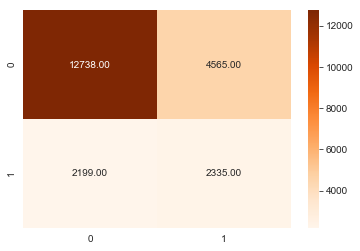

In [91]:
confusion_matrix_logistic = metrics.confusion_matrix(labels_test, labels_pred)
sns.heatmap(confusion_matrix_logistic, annot=True,
            fmt='.2f', cmap='Oranges')

In [92]:
confusion_matrix_logistic

array([[12738,  4565],
       [ 2199,  2335]], dtype=int64)

In [93]:
df_features.columns.to_list()

['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays', 'Age']

In [94]:
# 使用statsmodels查看各因素的P值
import statsmodels.api as sm
from scipy import stats

features_train_sm = features_train.copy()
features_train_sm['intercept'] = 1

model = sm.Logit(labels_train, features_train_sm).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.480194
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                No-show   No. Observations:                87351
Model:                          Logit   Df Residuals:                    87345
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:                 0.03584
Time:                        18:09:53   Log-Likelihood:                -41945.
converged:                       True   LL-Null:                       -43504.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Scholarship     0.2448      0.028      8.870      0.000       0.191       0.299
Diabetes        0.0883      0.037      2.411      0.016       0.017       0.160
Alcoholism      0.1878      0.050      3.732      0.000       0.089       0.287
WaitDays        0.0269      0.001     52.407      0.000       0.026       0.028
Age            -0.0078      0.000    -19.292      0.000      -0.009      -0.007
intercept      -1.4680      0.017    -84.387      0.000      -1.502      -1.434
===============================================================================
"""

### 4.3 决策树模型

In [95]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000, random_state=42, max_features='auto', class_weight="balanced")
tree.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [96]:
tree.score(features_test, labels_test)

0.5732930347575217

In [97]:
tree.feature_importances_

array([9.59121183e-03, 7.54310200e-04, 0.00000000e+00, 8.84129992e-01,
       1.05524486e-01])

In [98]:
tree.decision_path(features_train)

<87351x65 sparse matrix of type '<class 'numpy.int64'>'
	with 582994 stored elements in Compressed Sparse Row format>

In [99]:
labels_pred = tree.predict(features_test)
labels_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [100]:
np.unique(labels_pred)

array([0, 1], dtype=int64)

In [101]:
print("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
print("Precision:",metrics.precision_score(labels_test, labels_pred))
print("Recall:",metrics.recall_score(labels_test, labels_pred))
print("F1 Score:",metrics.f1_score(labels_test, labels_pred))

Accuracy: 0.5732930347575217
Precision: 0.30597014925373134
Recall: 0.8319364799294221
F1 Score: 0.44739651286917326


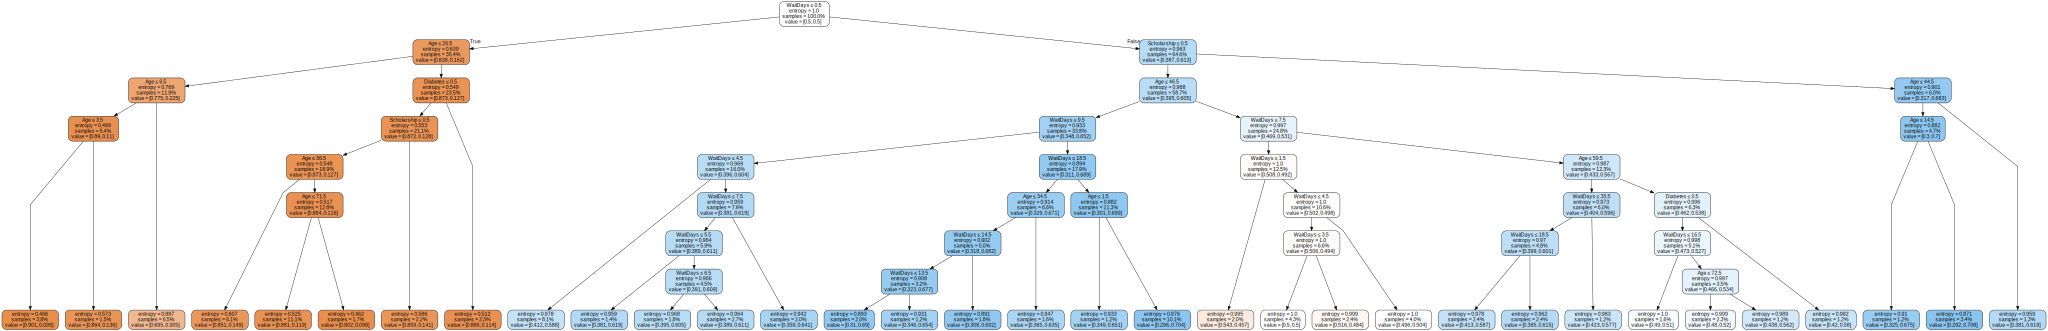

In [102]:


# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

dot_data = export_graphviz(tree, out_file=None, feature_names=df_features.columns.to_list(), leaves_parallel=True,
                filled=True, rounded=True, proportion=True,
                special_characters=True)


graph = graphviz.Source(source=dot_data)
graph

In [103]:
# 导出决策树图片
# https://graphviz.readthedocs.io/en/stable/api.html
graph.view(filename="tree.pdf", directory=".")

'.\\tree.pdf.pdf'

### 4.4 小结

在本节中，我们尝试利用经过整理的数据构建机器学期预测模型。但我们发现，传入的变量似乎不能很好的用于预测病人失约与否。这两个模型仅仅好于全部预测为失约的模型。模型调整和优化的工作依然任重道远。

 <a id='conclusions'></a>
 ## 5. 结论
 ---

 ### 5.1 对已经提出问题的回答

 为了研究为什么巴西Espirito Santo州首府Vitória市的公立医院预约就诊失约率高达20%时，我们提出了一些问题。在这些问题的指导之下，我们对数据集进行了分析，并发现了一些规律。我们接下来会逐一回答提出的问题，并总结规律。

 #### 5.1.1 病人

 我们针对病人群体，提出了5个问题；

     - 每位病人预约多少次？失约多少次？
     - 预约次数更多的病人是否有更高的几率失约？
     - 是否存在有用户短时间多次预约，并最终选择一次前往（类似高铁抢票）？
     - 哪些属性会对失约率有影响？
         - 身患重病（数据集中采集的病症）的病人，与普通病人相比，是否有不同的失约率？
         - 不同年龄段的病人是否对失约率有影响？
         - 短信提醒功能，对哪些病人有什么作用？

 我们最终发现：
 - 预约次数更多的病人的失约率，在预约次数为23次及更少时，确实是逐渐上升的；随后会快速下降；但是我们无法解释在预约次数达到23次时，究竟发生了什么。
 - 几乎不存在由用户短时间内多次预约，并最终少量次数前往的情况，因为如果这一情况属实，预约次数较少的用户失约率应该更高才对；
 - 病人的部分属性确实会对失约率有影响：
     - 身患重病（高血压，糖尿病，残疾）的病人失约率确实比普通人稍低，其中高血压病人失约率更低；
     - 观察不到年龄段对失约率影响的直接证据。
     - 收到短信提醒的用户，反而失约率显著高于平均水平。

 综上所述，对用户来说影响最大的因素就是，是否收到短信。有我们的观察发现，收到短信的用户多集中在等待3天以上，至等待一季这一时间段内。但我们尚不清楚短信的发送机制，因此不能推断因果关系。事实上，如果短信就是针对提前预约的人群发送的，那么27%左右的失约率可能已经是比较好的结果。


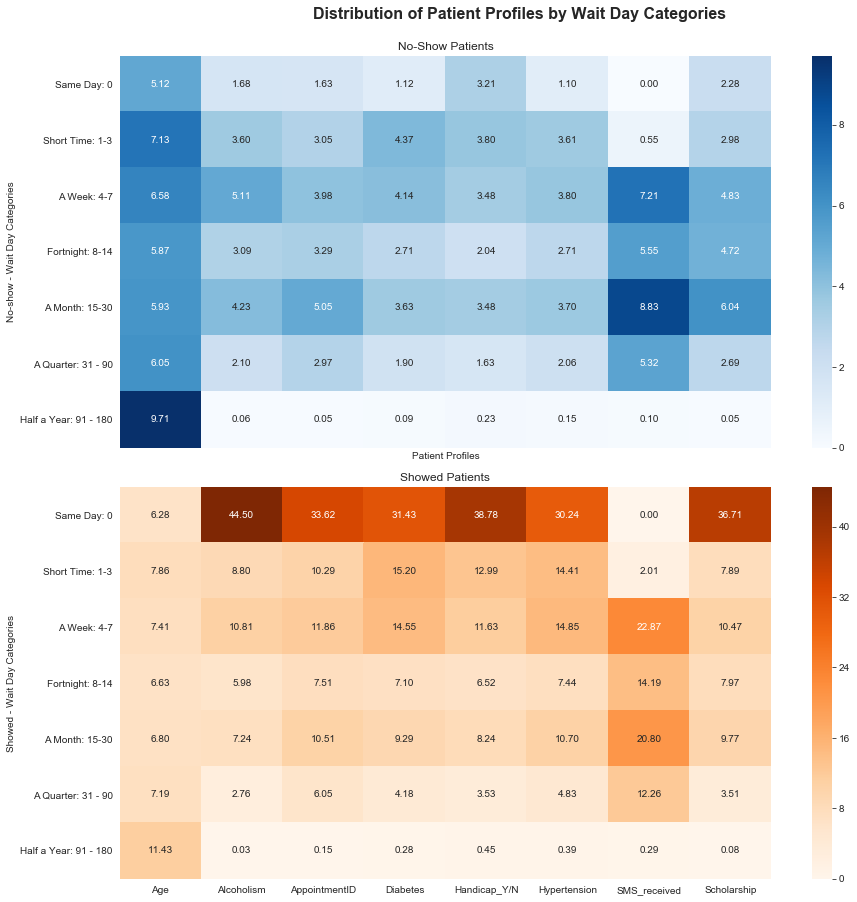

In [104]:
fig6 # 见 3.5.2


 #### 5.1.2 预约日期

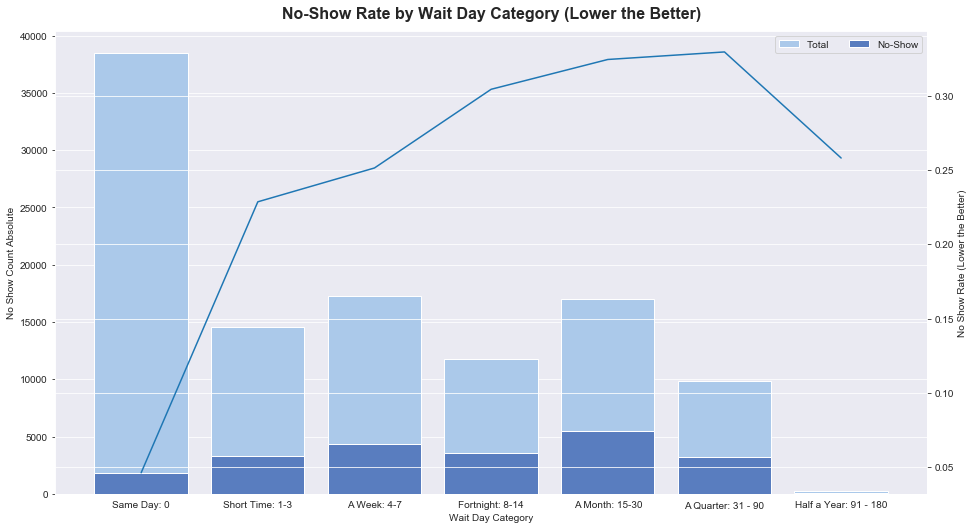

In [105]:
fig2 # 见2.3.3.1


 针对预约日期，我们提出了以下两个问腿：

     - 病人从预约到就诊，平均需要多长时间？
     - 病人的等待时间于失约率之间，有没有关系？

 我们最终发现：
 - 相当比例的病人选择了当天预约当天就诊，而这部分病人的失约率也确实是最低的。
 - 当等待时间不断加长时，失约率也会不断上升；这一规律适用除等待时间在半年左右的病人之外的所有病人。
 - 等待时间在15-30天的病人失约相对广泛，无论在地区分布还是在属性分布上都是如此；
 - 等待一季度的用户虽然失约率更高，但是因为人数较少，所以对整体影响相对较小。


 #### 5.1.3 街区

 针对病人们造访的医院所在街区，我们提出了如下问题：

     - 病人的失约率，是否与医院所在的街区有关联？

 针对这一问题，我们的探索显示，他们之间可能没有直接，显著的关联。从图4我们可以清楚的看到，除去有一个极端案例之外，其他所有地区的失约率比较稳定的维持在20.45%左右，标准差9.728187。少数地区的失约率确实较其他地区高，但是看不出显著的规律。相比之下，失约率随着时长不断增加的规律已经街区的角度得到验证。

 总体来说，街区这一项，还需要对街综合失约率和短期失约率都较高的地区做单独的分析，找出背后的原因。


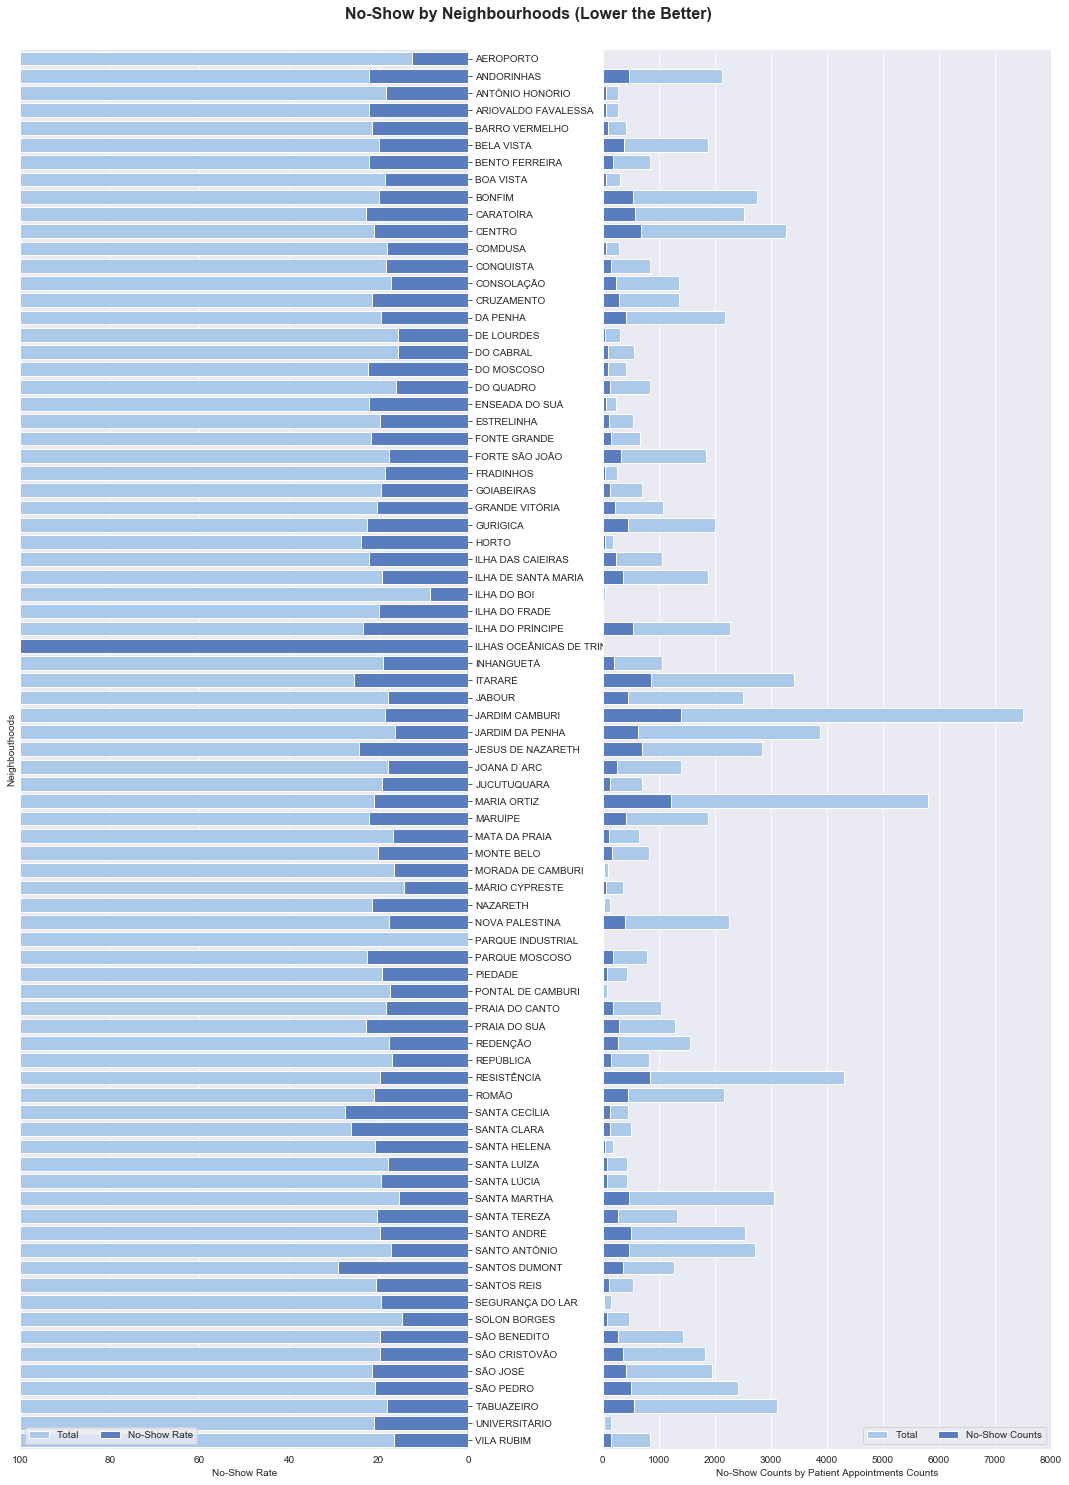

In [106]:
fig4



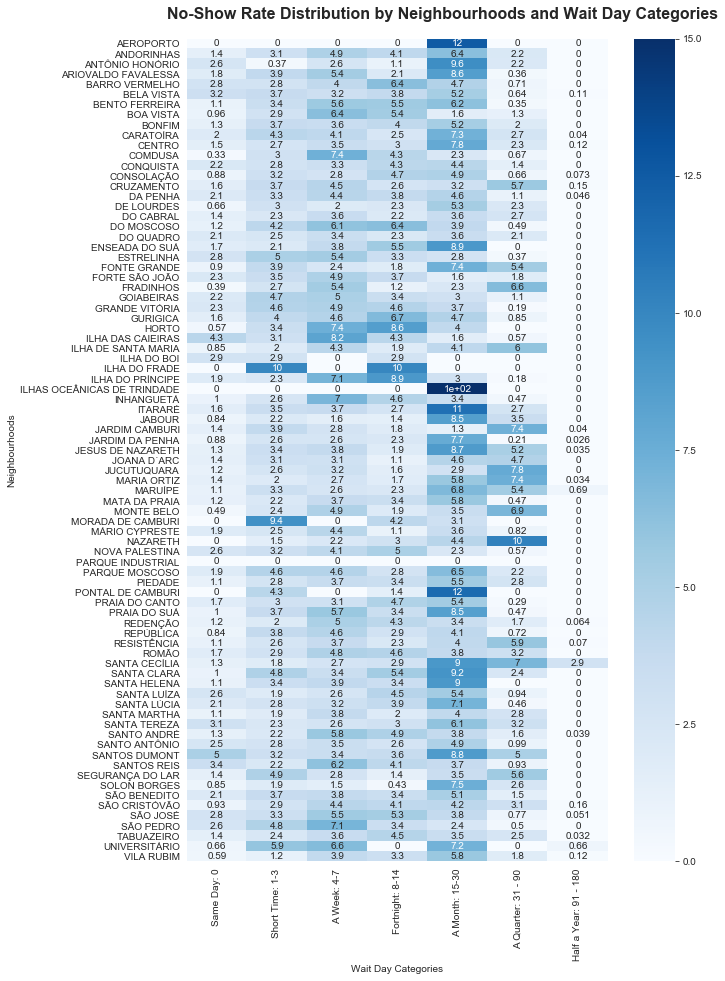

In [107]:
fig5


 ### 5.2 对已回答问题的总结

 针对“为什么综合失约率达到了20%”这一问题，在探索了众多可能性之后，无论是我们的分析还是我们的模型，都没有帮助我们得出明确的结论。目前总结出来的规律如下：

 我们首先发现，等待时间越长，病人的失约率越高，而等待周期在一个月左右的病人对整体的影响最大；

 其次，我们发现，收到提醒短信的用户，失约率较其他所有用户都高。进一步的研究发现，受到短信的用户失约率较随着等待时间的加长显著上升。考虑到短信作为提醒机制存在，受到短信的病人近30%的失约率已经是多年努力的成果。但短信特征要能真正发挥作用，还有如下问题需要探索：
 - 就短信本身来说：
     - 究竟为什么短信提醒没能最大程度的提醒病人即使就医呢？
     - 短信会在什么时间点发送？什么情况下发送？是否成功送达？
     - 如果短信需要病人回复确认就诊信息，是否会更好一些？   
 - 就短信与其他变量的关系来说：
     - 等待时间0-3天的用户受到短信的占比很少，而预约时间较长的用户更容易受到短信。短信与等待时长之间有共线性，需要绕过。
  
     
 再次，我们发现，部分街区确实有失约率异常的高的问题，但每个街区不均等和较小的样本容量意味着，某些异常值可能是抽样问题导致的，居于随机性；与此同时，街区失约率分布整体比较稳定，看不出明显的规律；
 
 最后，我们还发现，性别，酗酒这些要素对病人的失约率没有显著影响，部分严重疾病能够略微降低病人的失约率；
     
一连串的疑问可以帮助我们针对短信的失约情况做进一步调查。

无论如何，现有的特征都不能很好的说明用户的失约情况。
 


 ### 5.3 对本报告局限性的讨论

 我们的报告，在解决巴西病人失约率的问题上，显然做得远远不够。

 诚然，我们没能得出在统计学意义上站得住脚的结论，只是总结了从数据集中发现的规律。

 同时，非常遗憾，我们找出的一些规律，数据集也无法提供数据帮我们进一步验证。我们总结出的规律可能只能停留在假设阶段，无法通过进一步的观察和分析证伪。尤其是短信提醒。

 最后，数据集的数据本身不算完全，部分组别样本容量过小，导致我们在分析和判断之时已经将他们完全忽略。

 要想彻底解答病人失约的谜题，我们可能需要首先寻找真正关键的变量，对现有变量进行更多的变形和实验。

In [108]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


